# Mobile Ad Click Prediction 

## 1.1 Description 

A mobile ad is a type of ad that can appear on web pages and apps that are viewed on a mobile device like a cell phone or tablet. For Google Ads, “mobile” is defined as where the ad can appear on “mobile” devices. These include high-end mobile devices with smaller screens, such as smartphones. A decade ago, when smartphones were almost a cutting-edge idea, nobody would have expected that in just a few years, these devices will become indispensable to us. Nobody would have expected that they will take over the Internet, social media, and the way we share and read our news. “As of February 2017, mobile devices are accounted for 49.74 percent of web page views worldwide”, Statista.com writes. You cannot ignore the power of mobile and the time people spend browsing on their smartphones and tablets. Almost half of the online traffic comes from mobile devices. The mobile digital advertising set to grow from $162.6 in 2018 to $384.9 billion, worldwide, by 2023 according to eMarketer research. And if you haven’t already guessed mobile is the future of digital advertising.  Therefore, any marketing or advertising campaign should also focus on them. <br>
Mobile banner ads are the most popular form of advertising on mobile devices. In most cases, banners are displayed in unobtrusive places, at the top or at the bottom of a web page or an app, and display relevant texts or graphics.



 ## 1.2 Source/Useful Links

* Source : https://www.kaggle.com/c/avazu-ctr-prediction/overview/description <br>

## 1.3 Real-world/Business Objectives and Constraints 

<b>Objective:</b> Predict the pClick (probability of click) as accurately as possible. <br> <br>
The applications of having CTR are numerous:<br>
* Performance estimation for pricing<br>
* Optimization of the expected gain for real-time bidding.<br>
* Variance reduction for A/B testing: when comparing two publishing policies, using powerful predictive models allows to get rid of the context as much as possible, resulting in higher test significance.<br>

<b>Constraints:</b> Low latency, Interpretability.<br>
* We only have seconds to grab a viewer’s attention and on mobile devices people tend to browse quickly, and skip things of no interest. So it is very important that we need to get the ads that are having highest probabililty of clicking and then display them in the ranking order in the actual bussiness application. So latency is extremely important.
* We need to understand what kind of features make an ad more clickable so that we can get a better insight about how to maximize the ad revenue.

# 2. Machine Learning problem 

## 2.1 Data 

### 2.1.1 Data Overview 

We have been provided with 11 days worth of Avazu data to build and test prediction models. Here one more thing to note is that all the given features are categorical in nature and they are anonymized by hashing to protect the privacy of the users.


<table style="width:100%">
  <caption style="text-align:center;">train.csv <br> <br></caption>
  <tr>
    <th>Feature</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>ID</td>
    <td>The unique id for each Ad</td>
    </tr>
  <tr>
    <td>Click</td>
    <td>Whether the Ad is clicked or not (yes/no as 1/0)</td>
  </tr>
  <tr>
    <td>Hour</td>
    <td>date and hour information of when the ad is displayed</td>
  </tr>
  <tr>
    <td> </td>
    <th>user based features</th>
  </tr>
  <tr>
    <td>Device ID</td>
    <td> unique device identifier which can be treated as user id </td>
  </tr>
  <tr>
    <td>Device IP</td>
    <td>Ip address of the device at the time when the ad is shown can also be proxied for user id</td>
  </tr>
  <tr>
    <td>Device Model</td>
    <td>Model of the device like samsung or iphone etc</td>
  </tr>
  <tr>
  <tr>
    <td>Connection type</td>
    <td> Type of connectiion the mobile device is connected to like wifi,3G or 4G etc </td>
  </tr>
  <tr>
    <td>Device type</td>
    <td> Type of the device whether it is smart phone or tablet etc </td>
  </tr>
  <tr>
    <td> </td>
    <th> Context based features </th>
  </tr>
  <tr>
    <td> Site id </td>
    <td> Unique id of the website visited </td>
  </tr>
  <tr>
    <td>App id </td>
    <td> Unique id of the app used by the user </td>
  </tr>
  <tr>
    <td>Site Category</td>
    <td> Category of the Site visited</td>
  </tr>
  <tr>
    <td> App Category </td>
    <td> Category of the app used </td>
  </tr>
  <tr>
    <td> Site domain </td>
    <td> Domain of the site used </td>
  </tr>
  <tr>
    <td> App domain </td>
    <td> Domain of the app used </td>
  </tr>
  <tr>
    <td> Banner Position </td>
    <td> Position of the Ad on the mobile screen </td>
  </tr>
  <tr>
    <td> </td>
    <th> Anonymized Categorical variables </th>
  </tr>
  <tr>
    <td> C1,C14 to C21 </td>
    <td>  Anonymized Categorical variables </td>
  </tr>
</table>


## 2.2 Mapping the Real-world to a Machine Learning problem 

### 2.2.1 Type of Machine Learning Problem

It is a classification problem as we predicting the probability that the ad will be clicked or not.

### 2.2.2 Performance metric

* The metric chosen here is the binary log-loss as we are dealing with the probability values. <br>
Source : https://www.kaggle.com/c/avazu-ctr-prediction/overview/evaluation <br>
* Precision and recall as generally CTR prediction datasets are highly imbalanced in nature


###  2.2.3 Machine Learning Objectives and Constraints 

<b>Objective:</b> Reduce the binary log-loss as low as possible. <br>
<b>Constraints:</b> Low latency because we only have seconds to grab a viewer’s attention and on mobile devices people tend to browse quickly, and skip things of no interest. So it is very important that we need to get the ads that are having highest probabililty of clicking as fast as possible and then display them in the ranking order in the actual bussiness application.

In [1]:
# Loading libraries...
import pandas as pd    
import numpy as np
import random
from  datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# 3. Exploratory Data Analysis 

## 3.1 Reading and Preparing Data

We are loading 5 Million data points from a total of 40 Million data points for analysis

In [2]:
# Load Training Data..
n = 40428967  #total number of data points 
sample_size = 5000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))

data = pd.read_csv('train.csv',skiprows=skip_values)
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
1,10001868339616595934,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17747,320,50,1974,2,39,100019,33
2,10006415976094813740,0,14102100,1005,0,f84e52b6,d7e2f29b,28905ebd,ecad2386,7801e8d9,...,1,0,16838,320,50,1882,3,35,-1,13
3,10009699694430474960,1,14102100,1005,0,4dd0a958,79cf0c8d,f028772b,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
4,10015140740686523448,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,c51f82bc,d9b5648e,...,1,0,21611,320,50,2480,3,297,100111,61


In [3]:
data.shape


(5000000, 24)

In [4]:
data.columns


Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

Convert the hour column in to a proper date time format

In [5]:
data['hour']=data.hour.apply(lambda val : datetime.strptime(str(val), '%y%m%d%H'))
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
1,10002028568167339219,0,2014-10-21,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,1,2,20596,320,50,2161,0,35,100148,157
2,10004765361151096125,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
3,10005609489911213467,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61
4,10006958186789044052,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,18993,320,50,2161,0,35,100034,157


## 3.2 Analyzing features 

### 3.2.1 Getting sense out of the data

Getting the average CTR ( Click Through Rate ) for the entire dataset

In [6]:
# CTR(ad) = #Clicks(ad)/#Impressions(ad)
# Calculating net CTR for our dataset...

data['click'].value_counts()/data.shape[0]

0    0.830238
1    0.169762
Name: click, dtype: float64

So Click Through Rate is approx 17% , which means that 17% of all the ads that are displayed are clicked. This is a lot better than the CTR of 4% of the ads that are displayed while searching the web which come under the category of search ads through which google earns its revenue via ads with its search engine. No wonder the mobile ad industry is growing faster than ever.

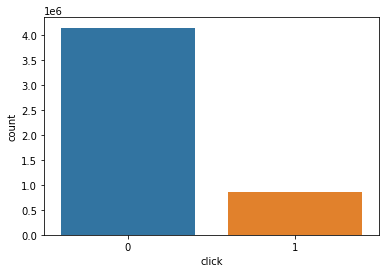

In [7]:
# Let us plot the figures as shown above so that we can visualize it properly
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='click',data=data)
plt.title("comparison between the number of non-clicks vs number of clicks")
plt.show()

* The above given plot is the visual representation of the number of data points belonging to each class , which shows the clear class imbalance.

Check whether there are any null values in our data

In [8]:
pd.isnull(data).sum(axis=0)

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

Check the unique values in each feature as this will give an indication of which features we might want to use initially for training (e.g. the id column has as many unique values as the length of the dataset so is not useful in building a model)

In [9]:
data.nunique()

id                  5000000
click                     2
hour                    240
C1                        7
banner_pos                7
site_id                3558
site_domain            4561
site_category            24
app_id                 5241
app_domain              336
app_category             29
device_id            599312
device_ip           1906314
device_model           6530
device_type               5
device_conn_type          4
C14                    2469
C15                       8
C16                       9
C17                     430
C18                       4
C19                      67
C20                     167
C21                      60
dtype: int64

* Here we can see that some features like device-id, device-ip are having many unique values, so if we featurize them with normal techiques such as one hot encoding then the feature set will become extremely huge, so we can use label encoding here.

### 3.2.2 Analysis of the context based features

<b>Banner Position</b>

* The probability of the Ad being clicked is heavily dependent on the position which it is placed. This is given by the banner position feature which has 7 positions in total.

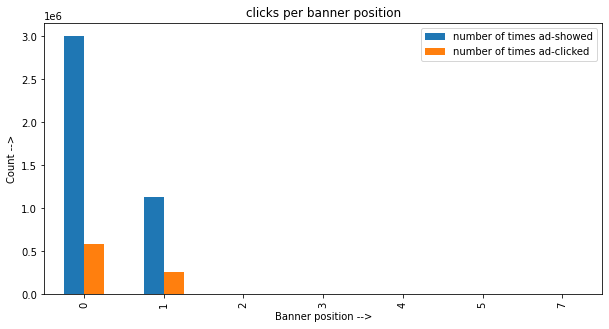

In [27]:
#Here we will 1st group the data points in the dataframe with the help of group by and then count the number of impressions in each group
#Here we can use groupby().count() but size() gives us the result in the form of a nice dataframe with multi-index
#for plotting we need to convert the multi-index gropu by object  in to columns so with the help of unstack() we will seperate the 0-impressions and 1-clicks as 2 columns with elements as counts
#finally plot the resulting single index dataframe with 0 and 1 columns with Bar plot the get the plot below

df_new=data.groupby(['banner_pos','click']).size().unstack()
df_new.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count -->')
plt.xlabel('Banner position -->')
plt.title('clicks per banner position')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

Here we can see that most of the ads are placed in the position 0 and 1 and then the positions 2 to 7 also have the ads but they are very less in scale when compared the to the positions 0 and 1

* Let us get the CTR per banner and compare them

In [29]:
#Now add another column to the dataframe with name = CTR
#This is the formula for computing the click thropugh rate (CTR)= total number of clicks/ total number of impressions
#Here total number of iimpressions = number of non-clicks+ no of clicks (0 column + 1 column )
df_new['CTR'] = df_new[1]/(df_new[0]+df_new[1])
df_new

click,0,1,CTR
banner_pos,,,
0,3008478,591094,0.164212
1,1136081,255485,0.183595
2,1435,193,0.118550
3,205,41,0.166667
4,749,164,0.179628
5,624,88,0.123596
7,3620,1743,0.325005


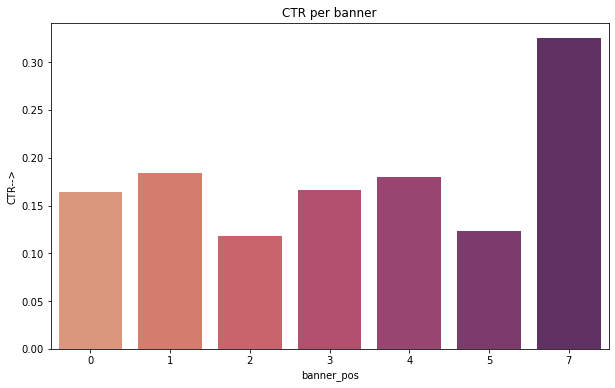

In [30]:
# plot the CTR per Banner in the form of a bar plot
plt.figure(figsize=(10,6))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per banner')
plt.show()

Here it is observed that position 7 has the highest CTR despite the fact that it is having less number of impressions when compared to the position 0 and 1. So it may be concluded that companies need to design the User interface in such a manner that the customer is guided to position 7 so that it has more chance of the user clicking the Ad in the position 7.

<b> Site ID </b>

let us analyze the site ID by plotting the impressions and clicks. We have observed from before that there are 3558 unique site-IDs.

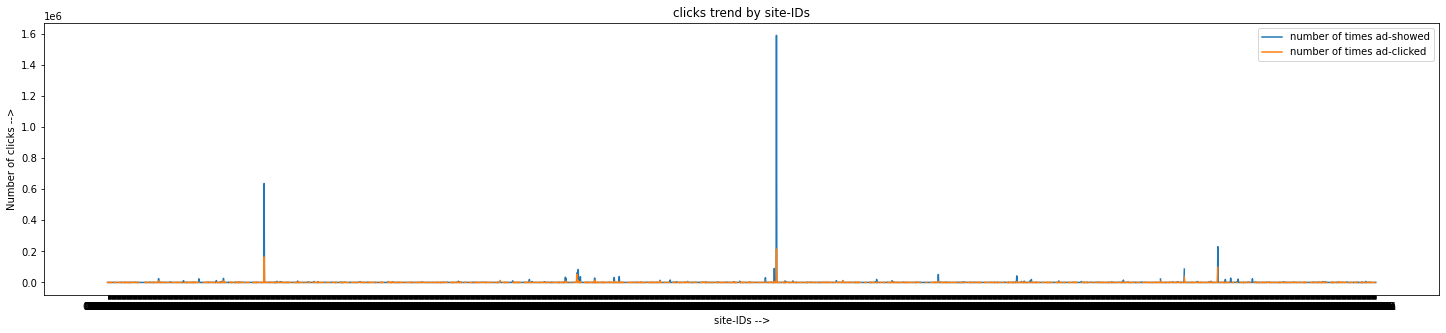

In [38]:
#Here we will 1st group the data points in the dataframe with the help of group by and then count the number of impressions in each group
#Here we can use groupby.count() but size() gives us the result in the form of a nice dataframe with multi-index
#for plotting we need to convert the multi-index group by object  in to columns so with the help of unstack() we will seperate the 0-impressions and 1-clicks as 2 columns with elements as counts
#finally plot the resulting single index dataframe with 0 and 1 columns with Bar plot the get the plot below
df_new=data.groupby(['site_id','click']).size().unstack()
plt.figure(figsize=(25,5))
#Here due to the huge variation in the scale of the feature values, when we plot the bar plot , the bars are not visible , so we will try to use normal line plot 
#In the line plot the values can be pin-pointed with the help of spikes as shown below
plt.plot(df_new)
plt.ylabel('Number of clicks -->')
plt.xlabel('site-IDs -->')
plt.title('clicks trend by site-IDs')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see there are only a few sites where the number of clicks and the impressions are the highest. This means that there is a high chance  that if the ad is placed in those sites there is high chance of clicking.
* Here if we look at the plot the number of impressions are also very huge for the top sites , which means these sites are the most visited by the users, which can probably mean the site may of social media or search engine mostly.

let us plot the CTR per site-id and see how it looks like

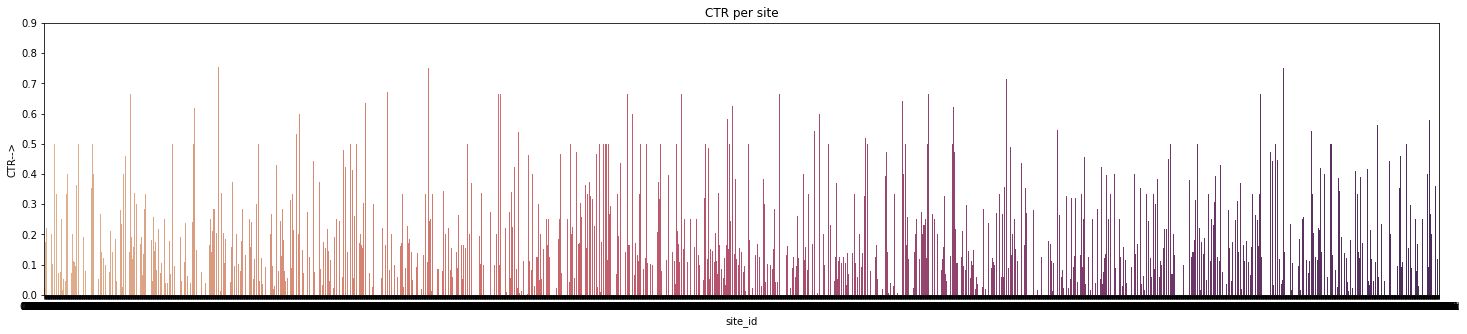

In [43]:
# plot the CTR per site
#This is the formula for computing the click thropugh rate (CTR)= total number of clicks/ total number of impressions
#Here total number of iimpressions = number of non-clicks+ no of clicks (0 column + 1 column )
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per site')
plt.show()

In [45]:
print('The average CTR for Site-ids is : ',df_new['CTR'].mean())

The average CTR for Site-ids is :  0.2085176225619151


Here it is interesting to see that many sites are having decent CTR and some of them are having very high CTR as much as 0.8 which is way greater than 0.17 which is the global average , so this feature might be pretty useful.

<b> App Id </b>

let us analyze the App ID by plotting the impressions and clicks. We have observed from before that there are 5241 unique App-IDs.

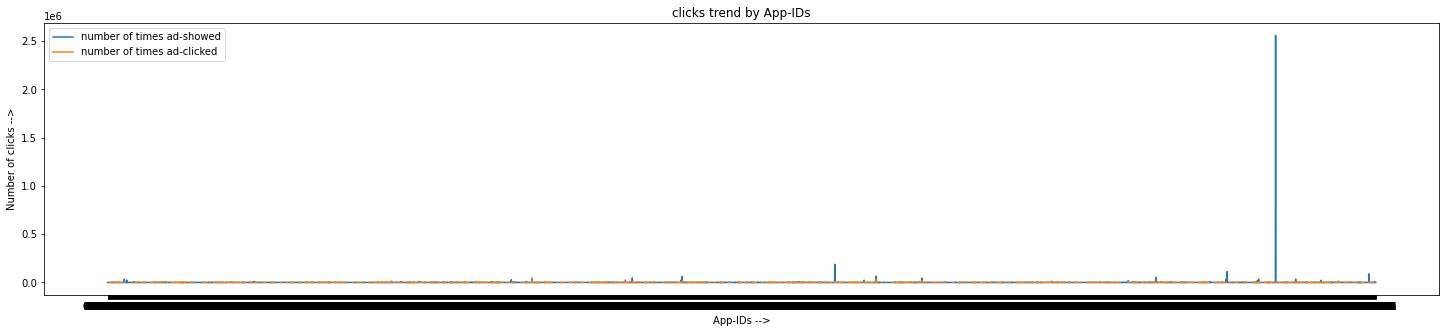

In [39]:
#Here we will 1st group the data points in the dataframe with the help of group by and then count the number of impressions in each group
#Here we can use groupby().count() but size() gives us the result in the form of a nice dataframe with multi-index
#for plotting we need to convert the multi-index group by object  in to columns so with the help of unstack() we will seperate the 0-impressions and 1-clicks as 2 columns with elements as counts
#finally plot the resulting single index dataframe with 0 and 1 columns with Bar plot the get the plot below
df_new=data.groupby(['app_id','click']).size().unstack()
plt.figure(figsize=(25,5))
#Here due to the huge variation in the scale of the feature values, when we plot the bar plot , the bars are not visible , so we will try to use normal line plot 
#In the line plot the values can be pin-pointed with the help of spikes as shown below
plt.plot(df_new)
plt.ylabel('Number of clicks -->')
plt.xlabel('App-IDs -->')
plt.title('clicks trend by App-IDs')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see there are only a few apps where the number of the impressions very high. Here unlike the site-ids we cannot see the clicks increase wrt the impressions, so we will find out if the user is more likely to click and ad displayed in the app or in the website.
* Here if we look at the plot there is an app where the number of impressions is very large which means that it is visited by almost all the people.

let us plot the CTR per app-id and see how it looks like

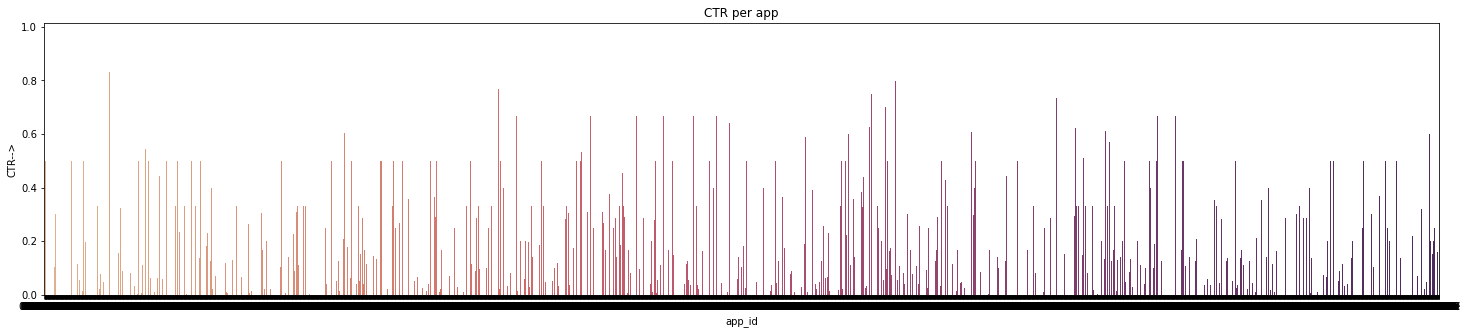

In [41]:
# plot the CTR per app-id
df_new=data.groupby(['app_id','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per app')
plt.show()

In [42]:
print('The average CTR for App-ids is : ',df_new['CTR'].mean())

The average CTR for App-ids is :  0.23943656806055794


* from the plots of the site-ids and the app-ids it is evident that most of the apps have very less CTR and impressions which means they display a few ads, and in contrast to this behaviour we can see that almost all the websites are displaying ads because we can see the CTR bars well distributed among the webisites than the Apps.
* Here it is interesting to see that the average CTR per app-id(23.9%) is more than the average CTR per site-id (20.85%) which means that even though the apps diaplay less ads , there is high chance that the user clicks the ad in the app rather than the website. This is an important observation which shows that both of these are useful features.

<b> Site domain </b>

let us analyze the site domain by plotting the impressions and clicks. We have observed from before that there are 4561 unique site-domains.

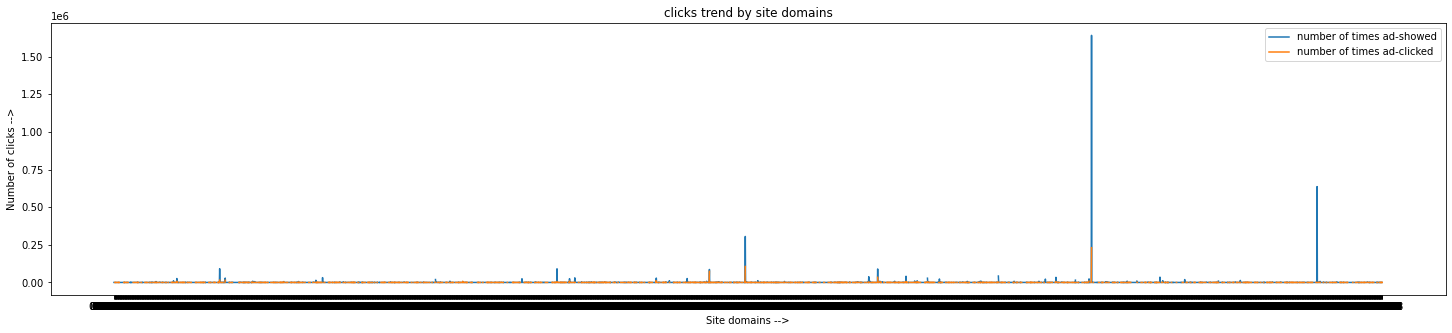

In [46]:
plt.figure(figsize=(25,5))
plt.plot(data.groupby(['site_domain','click']).size().unstack())
plt.ylabel('Number of clicks -->')
plt.xlabel('Site domains -->')
plt.title('clicks trend by site domains')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see that the tredn is same as the site-id where few site domains are having large number of impressions along with clicks.
* Here if we look at the plot there is an site domain where the number of impressions is very large which means that it is visited by almost all the people mostly it is a search engine.

let us plot the CTR per site domain and see how it looks like

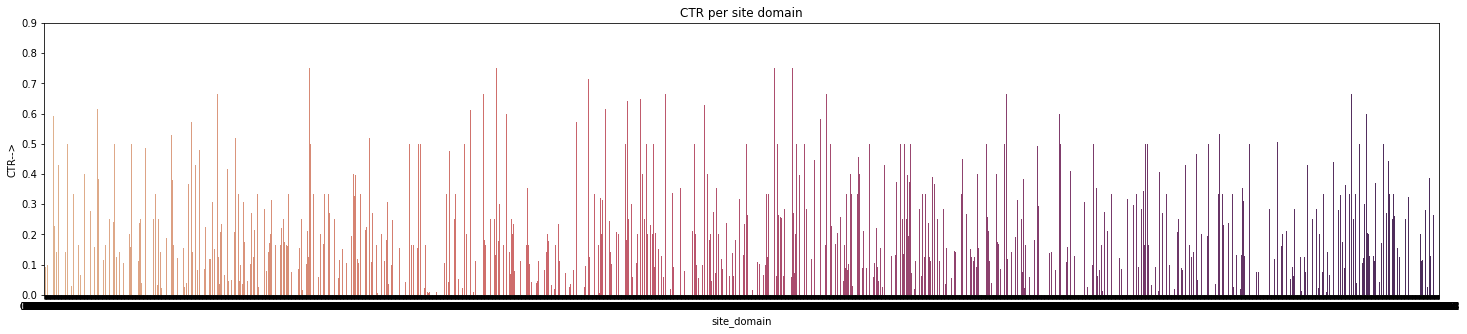

In [47]:
# plot the CTR per site domain
df_new=data.groupby(['site_domain','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per site domain')
plt.show()

In [48]:
print('The average CTR for site domains is : ',df_new['CTR'].mean())

The average CTR for site domains is :  0.23374501154735047


* Here the behaviour of the site domain is similar to the site-ids

<b> App domain </b>

let us analyze the App domain by plotting the impressions and clicks. We have observed from before that there are 336 unique site-domains.

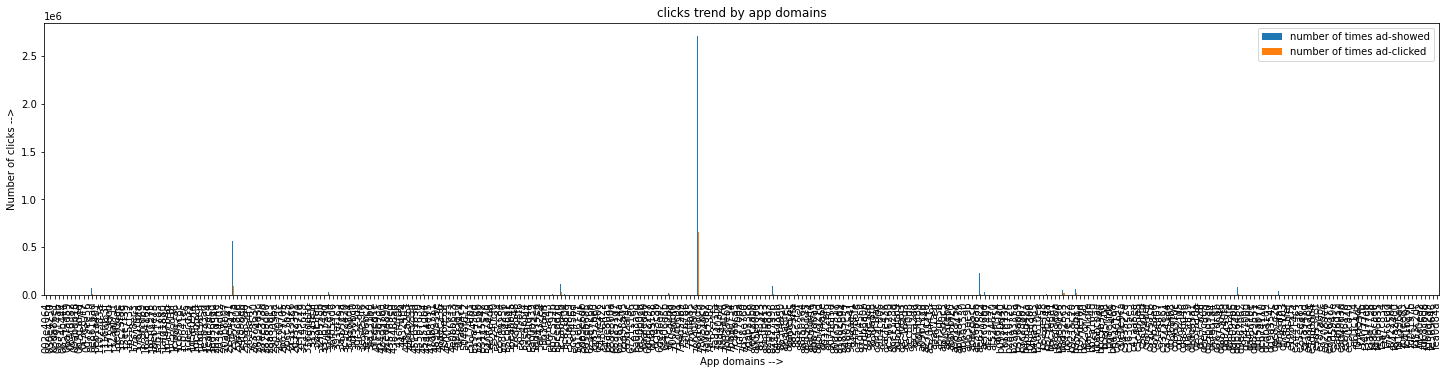

In [50]:
data.groupby(['app_domain','click']).size().unstack().plot(kind='bar',figsize=(25,5))
plt.ylabel('Number of clicks -->')
plt.xlabel('App domains -->')
plt.title('clicks trend by app domains')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see that some app domains are having high impressions count along with the clicks. we will have a detailed look by plotting the CTR per app domain.
* Here if we look at the plot there is an app domain where the number of impressions is very large which means that it is visited by almost all the people mostly it is a search engine or a social media app.

let us plot the CTR per App domain and see how it looks like

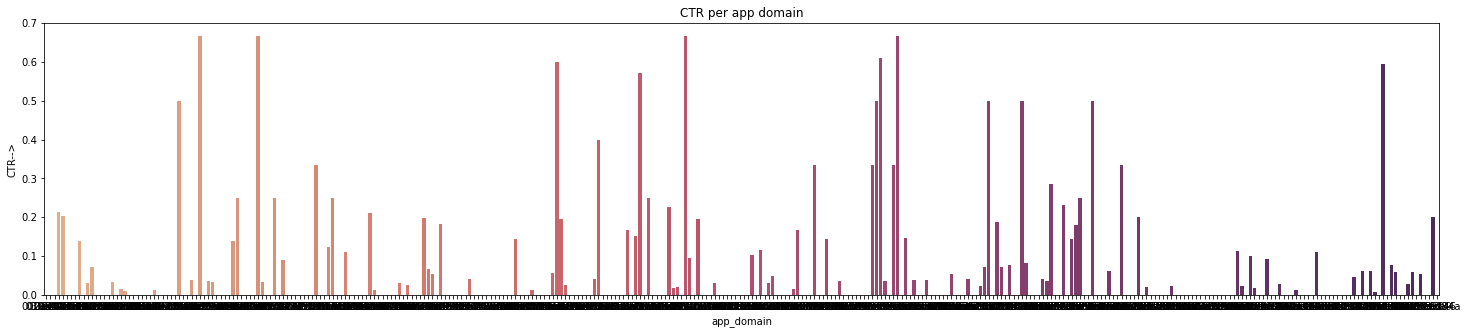

In [51]:
# plot the CTR per app domain
df_new=data.groupby(['app_domain','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per app domain')
plt.show()

In [52]:
print('The average CTR for app domains is : ',df_new['CTR'].mean())

The average CTR for app domains is :  0.16328228957788798


* Here if we observe , the average CTR per App domain is less than the average CTR per site domain. This may be simply due to the fact that number of site domains are more than the number of app domains by a large margin , which results in more number of impressions and followed by more chances of clicking and hence more the average CTR.
* These observations prove that the common startegy followed to increase the number of clicks is through increasing the number of impressions.

<b> Site Category </b>

let us analyze the Site category by plotting the impressions and clicks. We have observed from before that there are 24 unique site-categories.

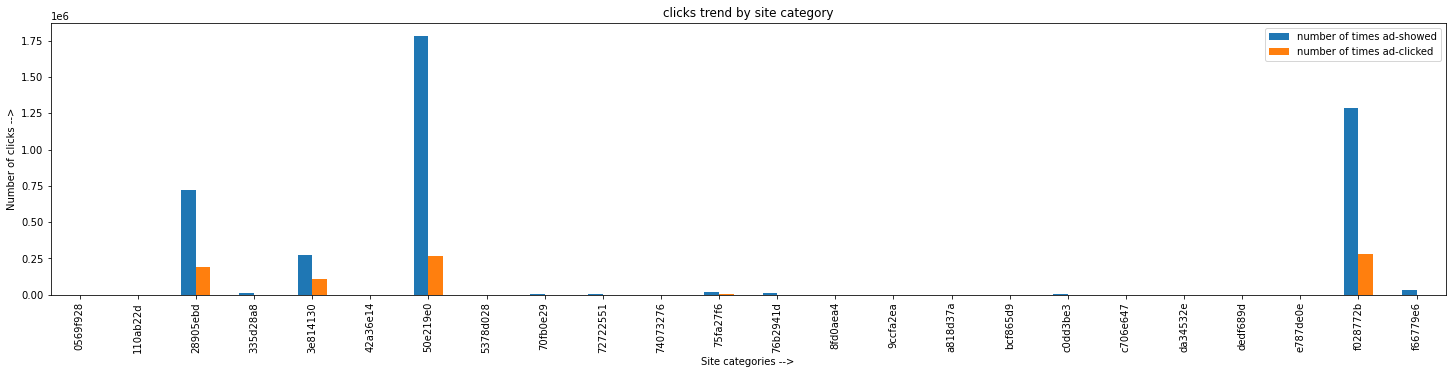

In [53]:
data.groupby(['site_category','click']).size().unstack().plot(kind='bar',figsize=(25,5))
plt.ylabel('Number of clicks -->')
plt.xlabel('Site categories -->')
plt.title('clicks trend by site category')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

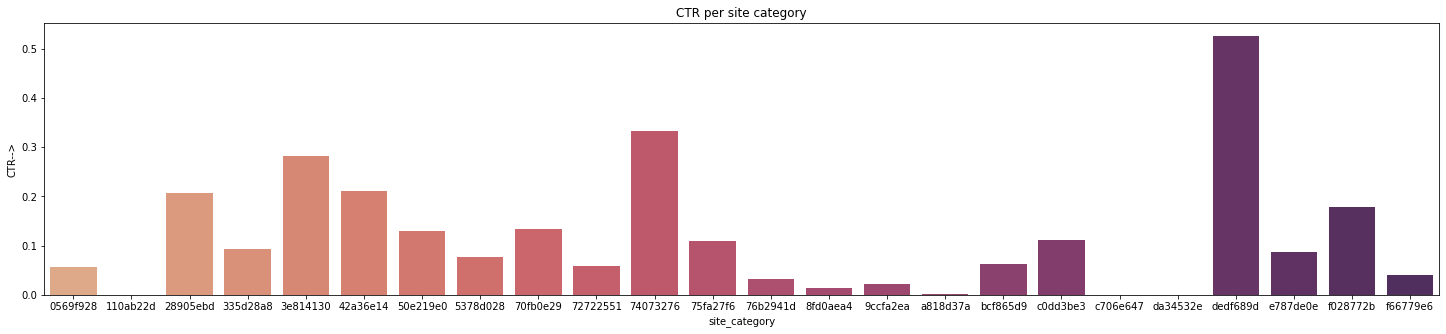

In [54]:
# plot the CTR per site category
df_new=data.groupby(['site_category','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per site category')
plt.show()

In [55]:
print('The average CTR for site category is : ',df_new['CTR'].mean())

The average CTR for site category is :  0.13204180397014426


* Here if we observe , CTR for some categories is very large despite having a very low impression count and CTR of some site categories is very low despite having very high impression count.
* Here we can also see that some site categories are having very high CTR and some are having very low CTR like 0, hence this is showing nice contrast, so this feature is also very useful for our prediction.


<b> App Category </b>

let us analyze the App category by plotting the impressions and clicks. We have observed from before that there are 26 unique App-categories.

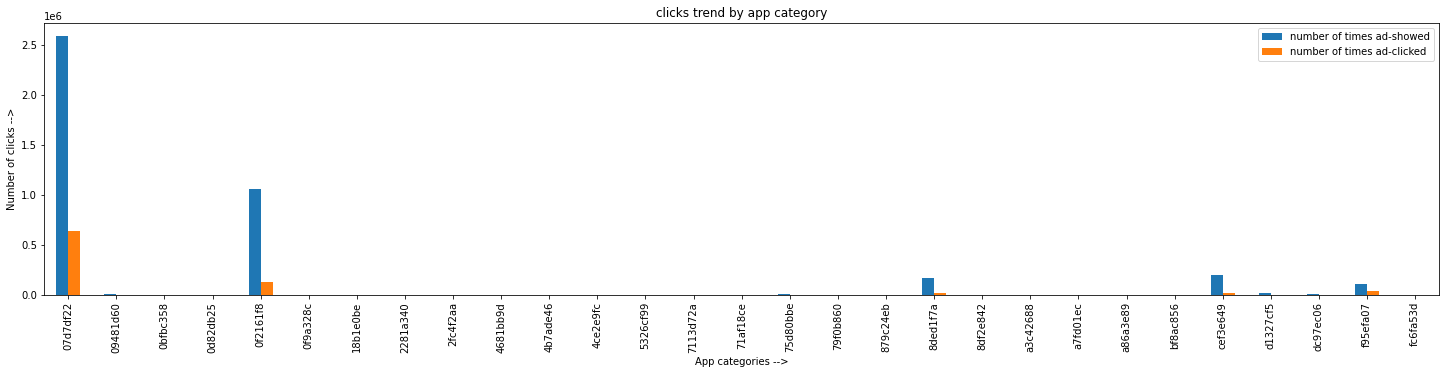

In [56]:
data.groupby(['app_category','click']).size().unstack().plot(kind='bar',figsize=(25,5))
plt.ylabel('Number of clicks -->')
plt.xlabel('App categories -->')
plt.title('clicks trend by app category')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

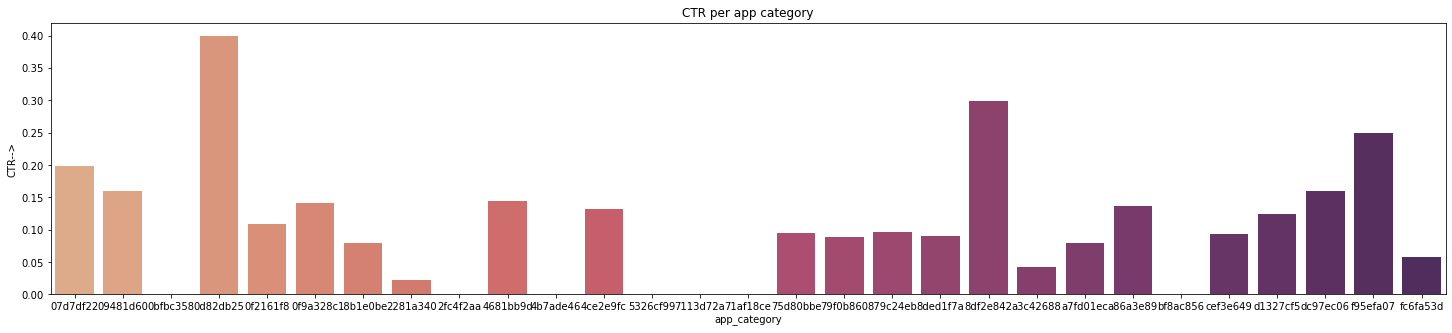

In [58]:
# plot the CTR per app category
df_new=data.groupby(['app_category','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per app category')
plt.show()

In [59]:
print('The average CTR for app category is : ',df_new['CTR'].mean())

The average CTR for app category is :  0.13630506489302918


* Here the trend for the app categories is very similar to site categories and the average CTR's are also almost same. So this can also be treated as a useful feature.


### 3.2.3 Analysis of user based features

<b> Device Id </b>

Here the number of unique device Ids are 599312, so we cannot analyze all of them , so we will take the top 10 device ids which have the highest number of impressions

In [60]:
print('The top 10 devices that have the most impressions')
print((data['device_id'].value_counts()/data.shape[0])[0:10])

The top 10 devices that have the most impressions
a99f214a    0.825196
0f7c61dc    0.000550
c357dbff    0.000503
936e92fb    0.000346
afeffc18    0.000232
987552d1    0.000106
28dc8687    0.000102
d857ffbb    0.000099
b09da1c4    0.000093
cef4c8cc    0.000088
Name: device_id, dtype: float64


* Here surprizingly we can see that only 1 device is having 82% of the impressions and the next device id in line is 0.05% which is very less.
* We will plot the impressions and clicks for these top 10 devices 

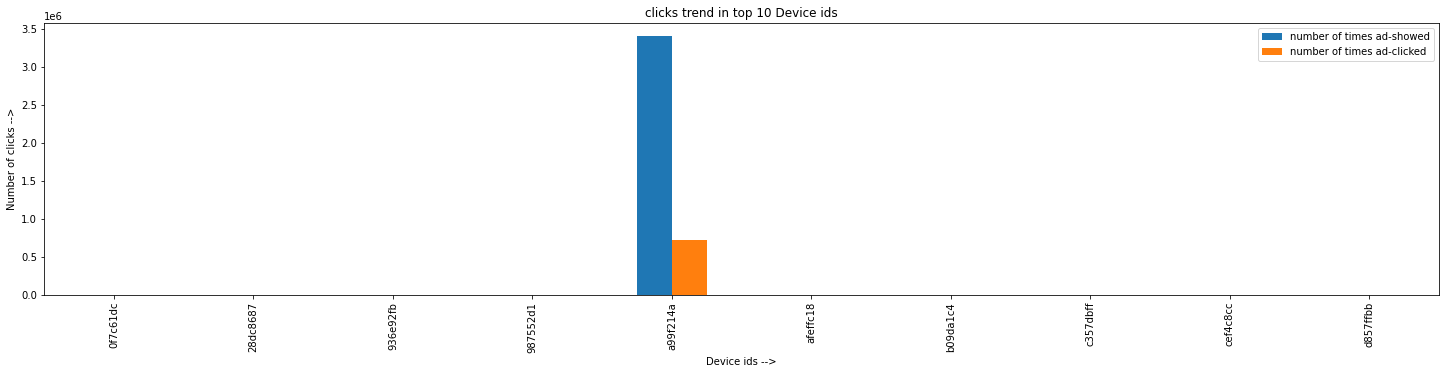

In [62]:
top10_device = data[(data['device_id'].isin((data['device_id'].value_counts()/data.shape[0])[0:10].index))]
top10_device.groupby(['device_id','click']).size().unstack().plot(kind='bar',figsize=(25,5))
plt.ylabel('Number of clicks -->')
plt.xlabel('Device ids -->')
plt.title('clicks trend in top 10 Device ids')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

Let us plot the CTR for top 10 device ids

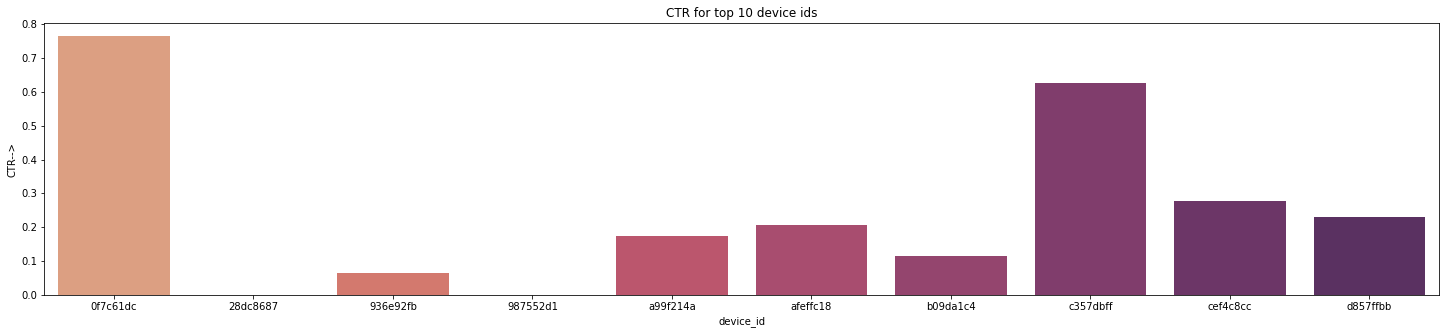

In [64]:
# plot the CTR per top 10 device ids
df_new=top10_device.groupby(['device_id','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR for top 10 device ids')
plt.show()

* Here we can observe that device id 'a99f214a' despite having enormous number of impressions and clicks, the CTR is lower than most in the top 10 device ids.
* We can also observe that some device ids, despite having very low impressions count , are having extremely high CTR of up  to 0.75 and 0.6.

* <b>Here we can use this device id to engineer a new feature called device-id counts, which is basically the number of ads per unique device id which would help us quantify the frequency of the ads for each device.</b>

In [35]:
#count the number of ads per unique user ( device ip )
data_group=data[['device_id','id']].groupby(['device_id']).count()

In [37]:
# make a column with values with device id counts
from tqdm import tqdm
id_count_feature=[]
for index in tqdm(data['device_id']):
    id_count_feature.append(data_group['id'][index])

100%|██████████| 5000000/5000000 [00:19<00:00, 252721.13it/s]


In [38]:
#finally add the column to the dataframe
data['device_id_counts']=id_count_feature

Let us analyze this and see if it is any useful for us, this is a numerical feature so we can check the distribution of the data 1st.


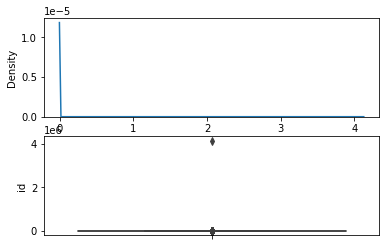

<Figure size 720x504 with 0 Axes>

In [39]:
#here we plot 2 plots which are KDE plot and the box plot
f, (ax1, ax2) = plt.subplots(2)
plt.figure(figsize=(10,7))
sns.kdeplot(data_group['id'], ax=ax1)
sns.boxplot(x=None,y='id',data=data_group, ax=ax2)
plt.show()

* Here we can see that we cannot see much due to the extreme skewness of the data, so let us see if we can get a view of the trend from other graphs as below.

Let us compute the CTR per device ip count and check if showing more number of ads to only a few users affects the CTR

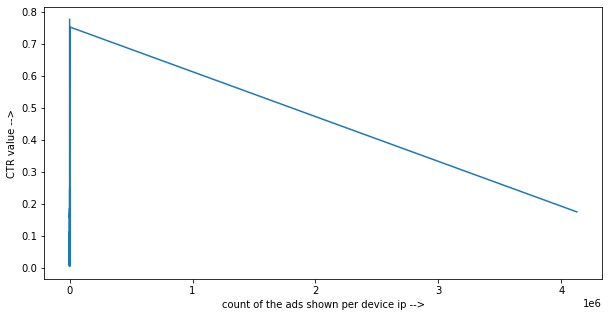

In [40]:
# plot the CTR per count of ads per device
df_new=data.groupby(['device_id_counts','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,5))
#for plotting the CTR for the features with large number of unique values we use line plot instaed of box plot because box plot does not show the missing values also as ticks in the plot
#But if we plot the line plot we can see exactly in what range the values are concentrated which is a very good source of information
plt.plot(df_new['CTR'])
plt.xlabel('count of the ads shown per device id -->')
plt.ylabel('CTR value -->')
plt.show()

* Here we cannot observe much from these graphs as there is extreme skewness in the data, as we have seen there is one device which is dominant ,so most probably that is causing the issue.
* So we will remove that and then compute the CTR and plot them.

In [44]:
df_new

click,0,1,CTR
device_id_counts,,,
1,399106.0,83117.0,0.172362
2,120239.0,19173.0,0.137528
3,59115.0,7773.0,0.116209
4,35121.0,4395.0,0.111221
5,23183.0,2637.0,0.102130
...,...,...,...
1147,863.0,284.0,0.247602
1690,1579.0,111.0,0.065680
2434,875.0,1559.0,0.640509


* Here we can see most of the devices are shown less than 10 ads.
* Here we can see only 1 device is shown 4 million ads ,so we will analyse the plots by removing it. But we can observe one thing that we are getting a CTR of 17.43% despite showing 4 million ads.

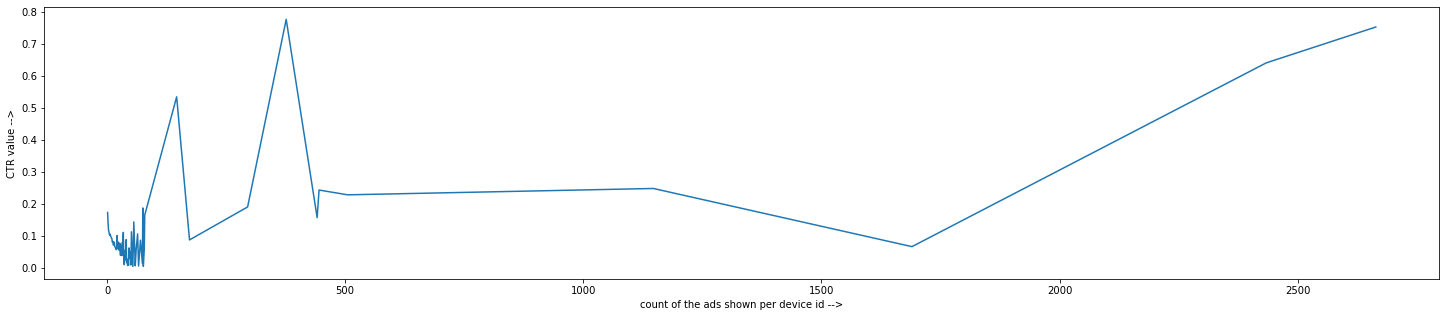

In [56]:
# plot the CTR per count of ads per device
df_new.dropna(inplace=True)
plt.figure(figsize=(25,5))
sns.lineplot(y=df_new['CTR'].values[:-1],x=df_new.index[:-1],palette='flare')
plt.xlabel('count of the ads shown per device id -->')
plt.ylabel('CTR value -->')
plt.show()

* By looking at the graph we can conclude that , there are very few devices which are shown many ads, precisely speaking we can see that there are 2 devices with high CTR values which are shown close to 200 and 500 ads and 1 device which is shown more than 2500 ads is having a high CTR of close to 0.8.
* By looking at the distribution we can see that this feature is extermely useful for our classification.

<b> Device Ip </b>

Here the number of unique device ips are 1906314 which basically treated as the proxy for the user, and here added to that the Ip addresses are anonymized, rendering them unable to get the location information which could be very useful otherwise. <br>
So the users itself in relation with the CTR may not give us much information.


* <b>Here we can use this device ip to engineer a new feature called device-ip counts, which is basically the number of ads per unique device ip which would help us quantify the frequency of the ads for each ip address.</b>

In [6]:
#count the number of ads per unique user ( device ip )
data_group=data[['device_ip','id']].groupby(['device_ip']).count()

In [10]:
data_group.head()

,id
device_ip,
00000a61,1
00001180,1
00001b40,8
00002963,1
000029d6,1


In [7]:
from tqdm import tqdm
ip_count_feature=[]
for index in tqdm(data['device_ip']):
    ip_count_feature.append(data_group['id'][index])

100%|██████████| 5000000/5000000 [00:32<00:00, 151624.64it/s]


In [8]:
data['device_ip_counts']=ip_count_feature

Let us analyze this and see if it is any useful for us, this is a numerical feature so we can check the distribution of the data 1st.


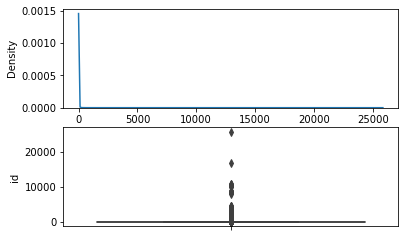

<Figure size 720x504 with 0 Axes>

In [13]:
f, (ax1, ax2) = plt.subplots(2)
plt.figure(figsize=(10,7))
sns.kdeplot(data_group['id'], ax=ax1)
sns.boxplot(x=None,y='id',data=data_group, ax=ax2)
plt.show()

* Here we can observe that most of the users are shown fewer ads and some users are shown abnormally high number of ads

Let us compute the CTR per device ip count and check if showing more number of ads to only a few users affects the CTR

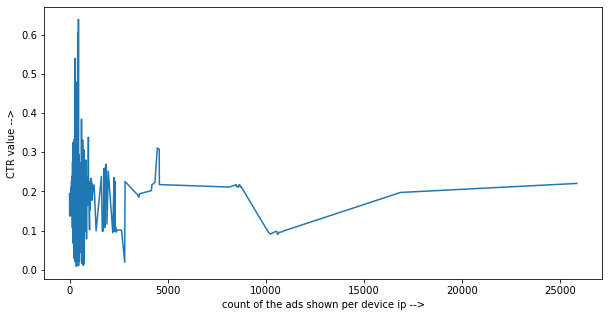

In [30]:
# plot the CTR per count of ads per user
df_new=data.groupby(['device_ip_counts','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,5))
plt.plot(df_new['CTR'])
plt.xlabel('count of the ads shown per device ip -->')
plt.ylabel('CTR value -->')
plt.show()

* Here the CTR is high for the users who are shown the less than 500 ads and we can see that some users despite seeing more than 10000 ads, the CTR is capped at 20% which is better than the average CTR of the whole dataset.
* By looking at the distribution we can see that this feature is extermely useful for our classification.

<b>Device Model </b>

let us analyze the Device model by plotting the impressions and clicks. We have observed from before that there are 6530 unique Device Models.

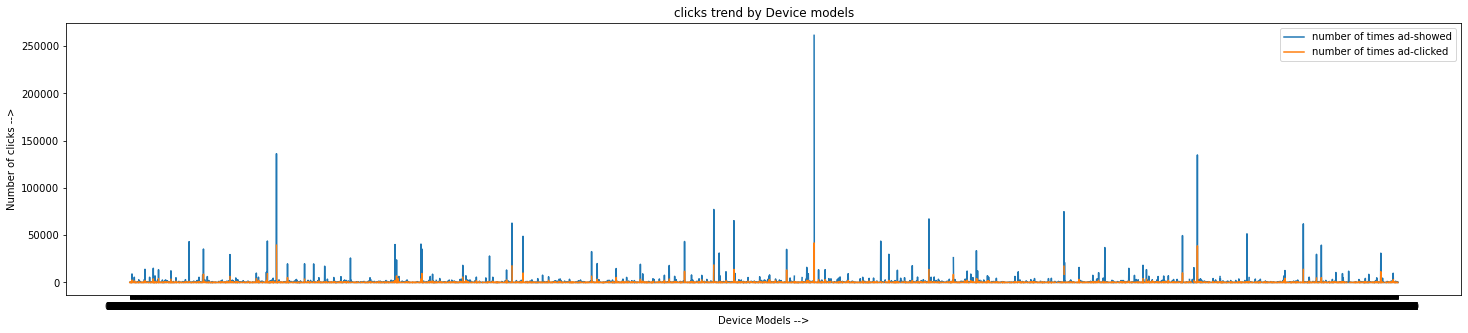

In [57]:
plt.figure(figsize=(25,5))
plt.plot(data.groupby(['device_model','click']).size().unstack())
plt.ylabel('Number of clicks -->')
plt.xlabel('Device Models -->')
plt.title('clicks trend by Device models')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see there are only a few device models where the number of the impressions very high. Here we can also see that number of clicks also increase with number of impressions but they are not increasing in proportion to the impressions and they are mostly capped at below 50000 clicks.
* Here if we look at the plot there is a device model where the number of impressions is very large which means it is used by many people.

let us plot the CTR per device model and see how it looks like

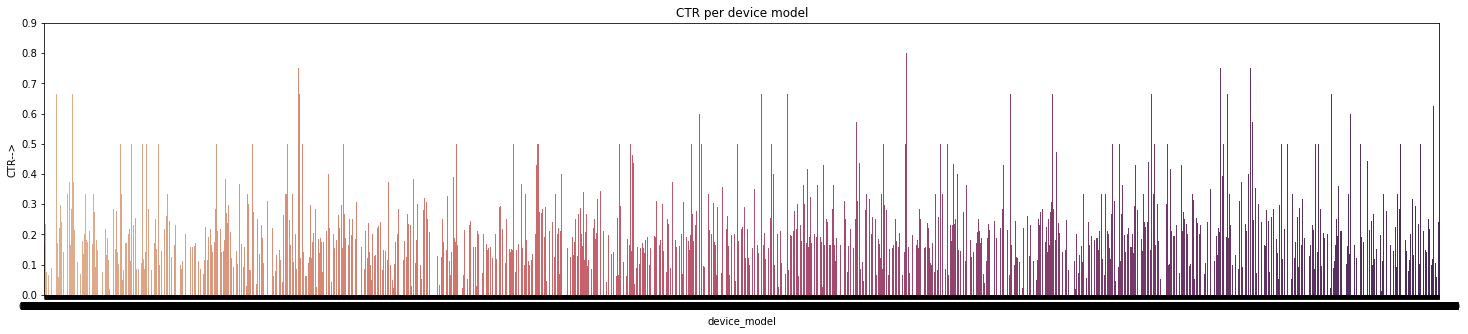

In [60]:
# plot the CTR per device model
df_new=data.groupby(['device_model','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per device model')
plt.show()

* Here the CTR values does not seem to be affected much by the skewness of the impressions but we can see the trend in the plot which shows that it is useful for our classification purpose.

<b> Device Type </b>

Here the number of decice types are 5 , we will analyze it by plotting the impressions and clicks.

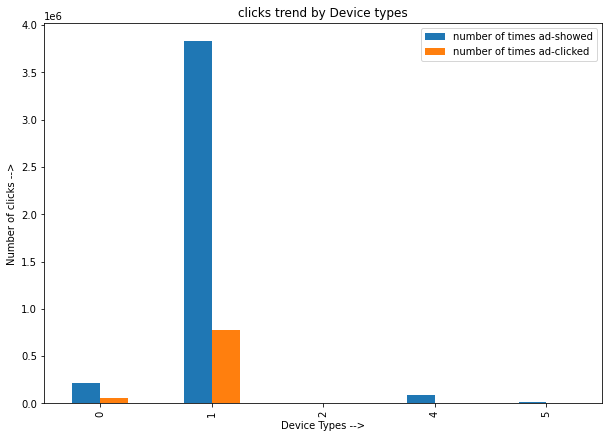

In [62]:
data.groupby(['device_type','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Number of clicks -->')
plt.xlabel('Device Types -->')
plt.title('clicks trend by Device types')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see that one device type is dominating and it having most number of impressions and clicks , let us analyze more by plotting the CTR per device type.

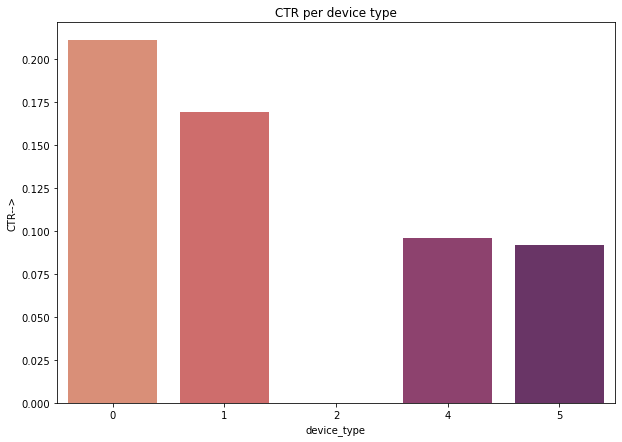

In [63]:
# plot the CTR per device model
df_new=data.groupby(['device_type','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per device type')
plt.show()

* Here the most dominating device types are type 1 and 0 and from the impressions ,it seems that device type 1 is the most common device type probably it is a smart phone with touch screen.
* CTR for the device type 1 is less than the CTR for device type 0 despite the device 0 having very less number of impressions compared to device type 1, so it seems that certain demographic of users are using device type 0 which may be some what older device type, so those users have a high chance of clicking the ad than the majority of the users who are using the device type 1 which may be the latest version of the mobile.

<b> Device connection type </b>

We can see that there are 4 types of device connections available in the data. Let us see if the device connection type effects the CTR.

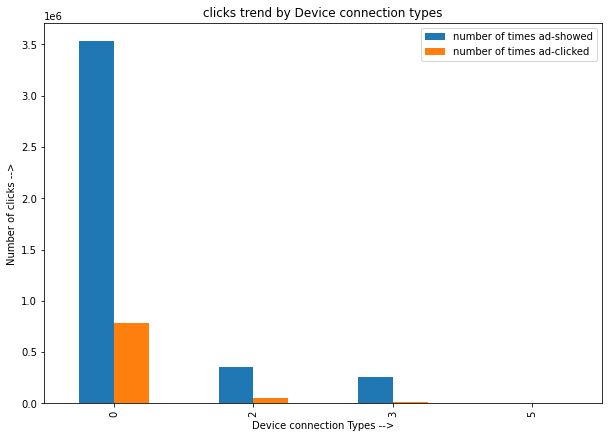

In [64]:
data.groupby(['device_conn_type','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Number of clicks -->')
plt.xlabel('Device connection Types -->')
plt.title('clicks trend by Device connection types')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here the connection type 0 seems to be the common connection type because it has the highest number of impressions, let us plot the CTR also to see if it effects the CTR.

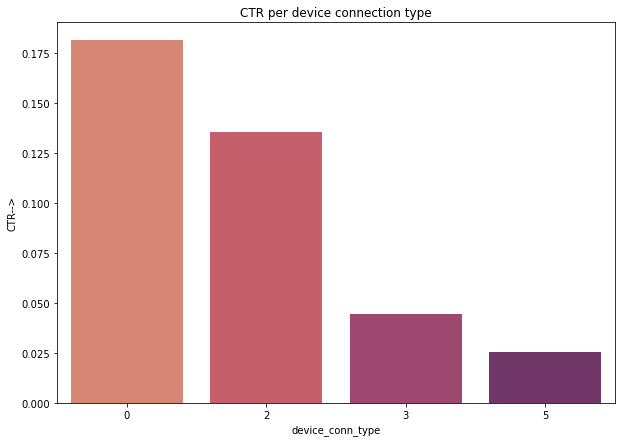

In [65]:
# plot the CTR per device model
df_new=data.groupby(['device_conn_type','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per device connection type')
plt.show()

* Here the CTR for device connection type 0 has the highest CTR which is actually proportional to the number of impressions, we can assume the number given to the connections as the speed of the connections, so if that is the case then faster connection implies more CTR. so this feature seems useful for our classification task.

### 3.2.4 Analysis of anonymized categorical variables 

Given the fact that the feature names are also anonymized , they seem to be pretty important and essential features which actually decides whether an ad will be clicked or not , so let us explore.

<b> C1 </b>

This feature is kept seperate from the rest of the anonymized features and it is having 7 unique values let is analyze this feature 1st.

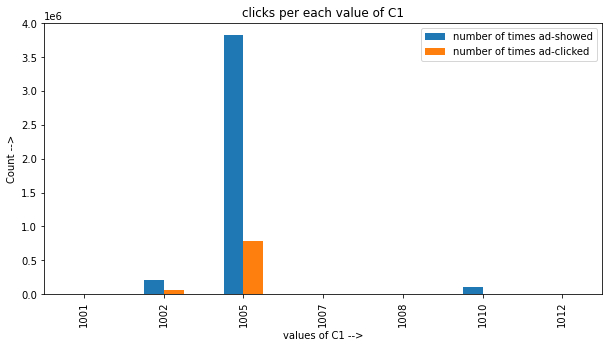

In [66]:
data.groupby(['C1','click']).size().unstack().plot(kind='bar',figsize=(10,5))
plt.ylabel('Count -->')
plt.xlabel('values of C1 -->')
plt.title('clicks per each value of C1')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* The values of this feature are not hashed, so this indicates that this feature is a numerical feature.
* from the above plot, it seems that the most common value this feature takes is 1005, because it has more number of impressions and clicks, so let us see the contribution to the CTR.

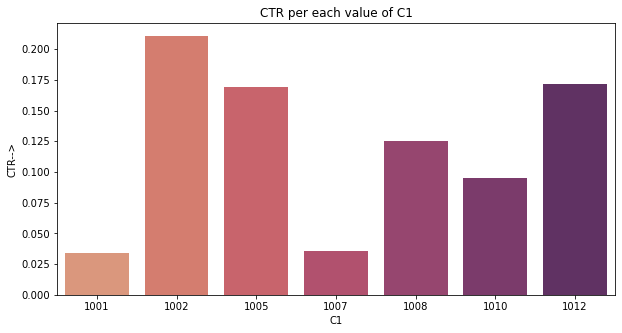

In [73]:
# plot the CTR per value of the C1
df_new=data.groupby(['C1','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per each value of C1')
plt.show()

* There is definitly a trend here, and we could clearly see that 1002 has more CTR than 1005 despite 1005 being the most common value of the C1.

<b> C14 </b>

We can see that C14 takes 2469 values, so we will analyze it as shown below.

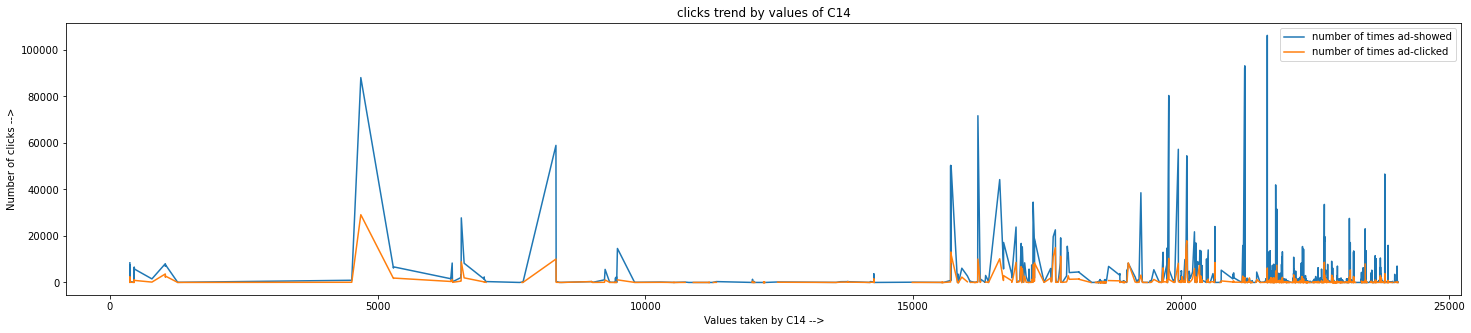

In [70]:
plt.figure(figsize=(25,5))
plt.plot(data.groupby(['C14','click']).size().unstack())
plt.ylabel('Number of clicks -->')
plt.xlabel('Values taken by C14 -->')
plt.title('clicks trend by values of C14')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* We can see that C14 has values mostly between 16000 and 24000 and very few values it takes are less than 10000.
* Here we will first print the values of C14 to check whether it takes a particular value or range of values like decimal real numbers.

In [72]:
df_new=data.groupby(['C14','click']).size().unstack()
df_new

click,0,1
C14,,
375,8438.0,2409.0
376,12.0,6.0
377,7627.0,2131.0
380,7162.0,1840.0
381,399.0,101.0
...,...,...
24043,119.0,3.0
24044,2.0,1.0
24047,1.0,1.0


* As suspeected it is only taking integer values, so there may actually be an order to it and it may a numerical feature related to the count of some value.
* We will plot the CTR per each value taken by the C14 and then check if it contributes to our classification.

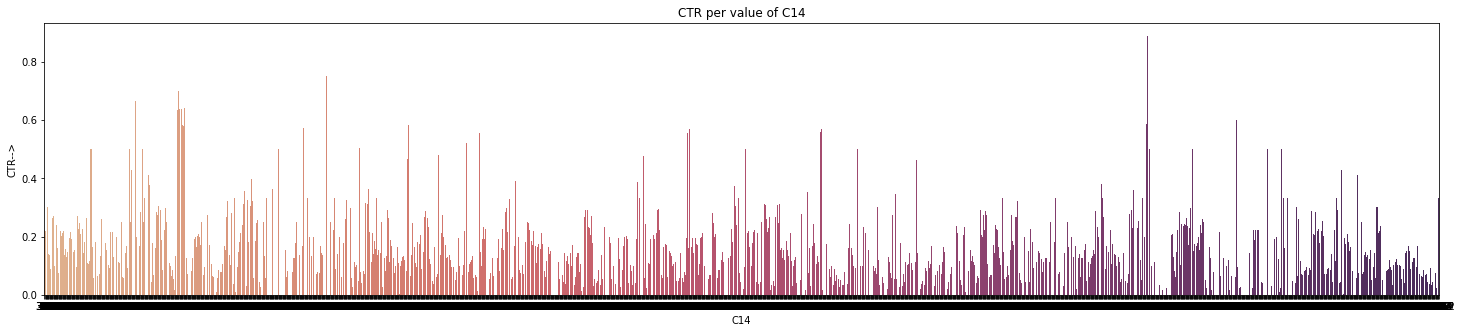

In [75]:
# plot the CTR per value of the C14
df_new=data.groupby(['C14','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per value of C14')
plt.show()

* Here we can see the trend in the CTR values which means that this feature will also be useful for our prediction and also we can see that one of the values go as high as 0.8 and follwed by some values touching close to 0.6, which shows a good amount of contribution towards classification.

<b> C15 </b>

From the previous analysis we can see that C15 takes 8 Unique values, let us plot the impressions and clicks and see the trend.

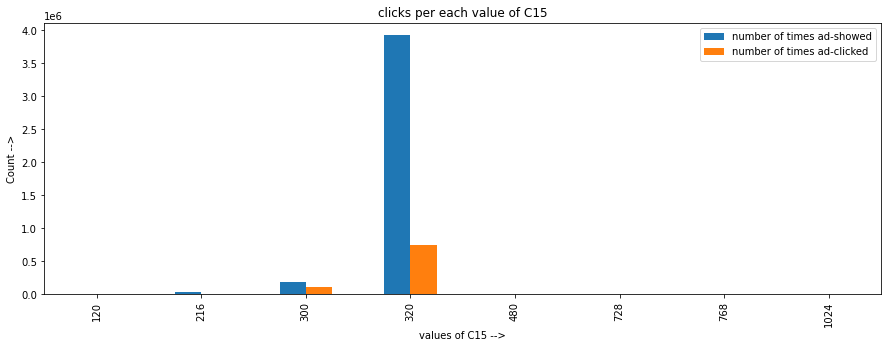

In [76]:
data.groupby(['C15','click']).size().unstack().plot(kind='bar',figsize=(15,5))
plt.ylabel('Count -->')
plt.xlabel('values of C15 -->')
plt.title('clicks per each value of C15')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* The 1st thing we notice from the above plot is that the values taken by the feature C15 corresponds to somekind of resolution like 120 pixels and 1024 pixels etc, so this may indeed correspond to the size of the Ad displayed in the webpage or the app of the mobile.
* Here we can see that most of the ads are having a C15 value of 320 which has highest number of impressions follwed by the C15 value of 300, which shows that this may be the most common size of the Ad the companies opt for.

Let us plot the CTR per size ( value of C15 ) and check which size has the highest CTR

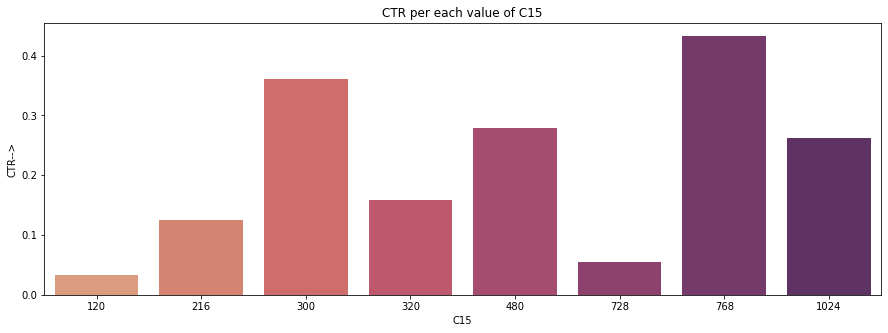

In [77]:
# plot the CTR per value of the C15
df_new=data.groupby(['C15','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(15,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per each value of C15')
plt.show()

* Despite 320 being the most common value , it is having one of the lowest CTR's , but we can see that full screen ads are contributing decently like 768 has one of the highest CTR's of above 40% and then we can conclude that relatively bigger ads are having more chance of clicking by the user.

<b>C16</b>

From the previous analysis we can see that C16 takes 9 Unique values, let us plot the impressions and clicks and see the trend.

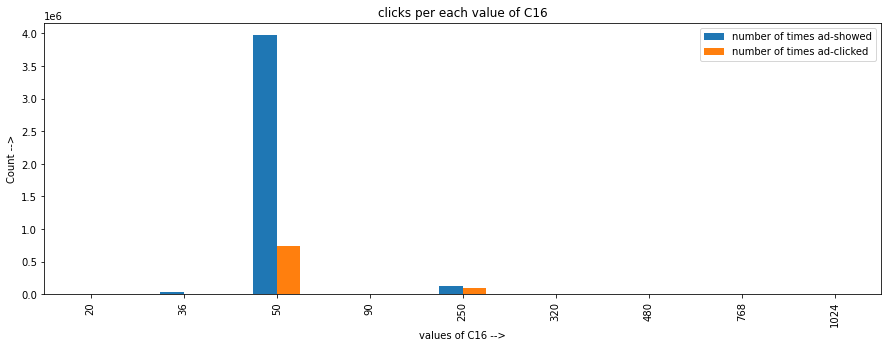

In [78]:
data.groupby(['C16','click']).size().unstack().plot(kind='bar',figsize=(15,5))
plt.ylabel('Count -->')
plt.xlabel('values of C16 -->')
plt.title('clicks per each value of C16')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here also we notice from the above plot is that the values taken by the feature C16 also corresponds to somekind of resolution ( number of pixels ), But the magnitude of some of the values this feature takes is less than the C15 feature, so if C15 may correspond to the width of the Ad, then C16 may correspond to the height of the Ad. As mostly the case with the mobile ads is that they are rextangular in shape.
* Here we can see that most of the ads are having a C16 value of 50 which has highest number of impressions follwed by the C15 value of 250, which shows that 50 is the most common size of the Ad the companies opt for.

Let us plot the CTR per height ( value of C16 ) and check which height size has the highest CTR

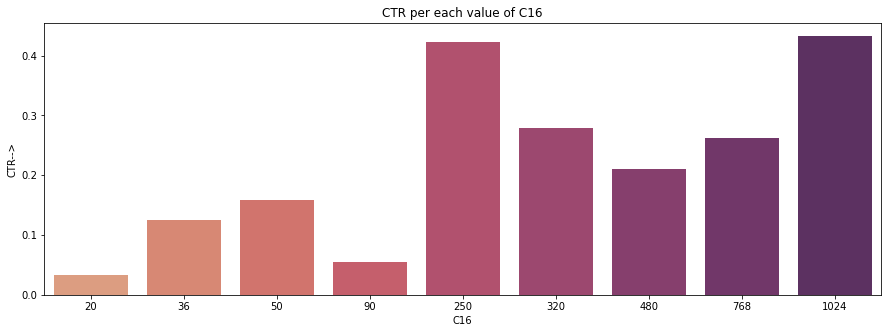

In [79]:
# plot the CTR per value of the C15
df_new=data.groupby(['C16','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(15,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per each value of C16')
plt.show()

* Here also despite 50 being the most common value , it is having one of the lowest CTR's , but here also we can see that full screen ads are contributing decently like 1024 has one of the highest CTR's of above 40% follwed by 250 then we can conclude that relatively bigger ads are having more chance of clicking by the user.

<b> Here instead of analyzing the values individually , we can combine them and then find out which combination of the width and height is giving the optimum CTR. </b>

In [105]:
data_new=data.groupby(['C15','C16','click']).size().unstack()
data_new.head()

click          0       1
C15 C16                 
120 20       359      12
216 36     32600    4631
300 50     55854    9681
    250   129031   94699
320 50   3913008  737326

In [107]:
data_new

click            0       1
C15  C16                  
120  20        359      12
216  36      32600    4631
300  50      55854    9681
     250    129031   94699
320  50    3913008  737326
     480     10079    2694
480  320       189      73
728  90       8722     512
768  1024      110      84
1024 768       248      88

Here we cannot plot the multi-index values directly due to an implementation error, so we will convert the index values to normal string values and then plot the graph

In [123]:
list_index=[]
for row in list(data_new.index):
    list_index.append(str(row))
list_index

['(120, 20)',
 '(216, 36)',
 '(300, 50)',
 '(300, 250)',
 '(320, 50)',
 '(320, 480)',
 '(480, 320)',
 '(728, 90)',
 '(768, 1024)',
 '(1024, 768)']

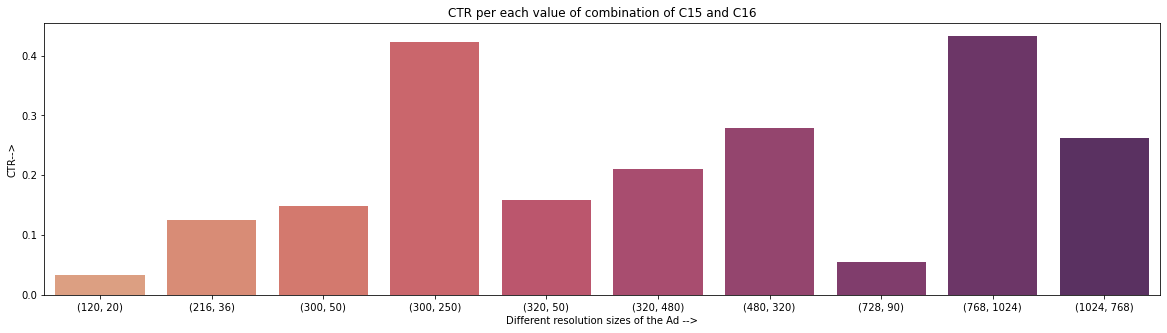

In [124]:
data_new['CTR']= data_new[1]/(data_new[0]+data_new[1])
plt.figure(figsize=(20,5))
sns.barplot(y=list(data_new['CTR'].values),x=list_index,palette='flare')
plt.ylabel('CTR-->')
plt.xlabel('Different resolution sizes of the Ad -->')
plt.title('CTR per each value of combination of C15 and C16')
plt.show()

* Here we can get a clear picture of what resolutions give the highest chance of clicking the Ad. As deduced earlier we can see that bigger Ads are having more chance of clicking and also the Ads that are havnig both height and width in the range between (300 to 500) seem to give the high CTR as shown in thr plot above.
* We can get a clear trend with the help of these values , so we can say that these features are both pretty useful for our prediction task.

<b> C17 </b>

Here we have 430 unique values for C17, let is plot the impressions and clicks as shown below.

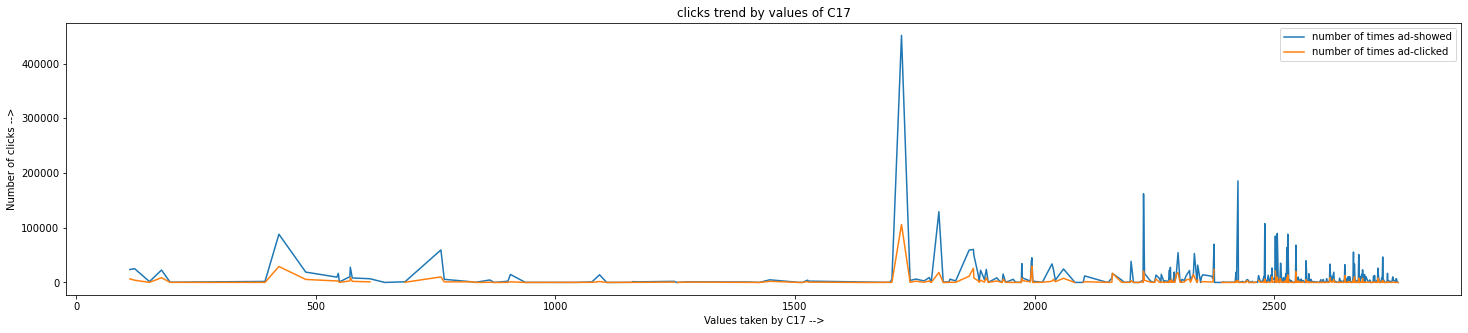

In [125]:
plt.figure(figsize=(25,5))
plt.plot(data.groupby(['C17','click']).size().unstack())
plt.ylabel('Number of clicks -->')
plt.xlabel('Values taken by C17 -->')
plt.title('clicks trend by values of C17')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* if we look at this plot this is very similar to C14 feature
* Let us print the values side by side and see if there is any similarity between C14 and C17

In [127]:
df_new=data.groupby(['C14','click']).size().unstack()
df_new

click,0,1
C14,,
375,8438.0,2409.0
376,12.0,6.0
377,7627.0,2131.0
380,7162.0,1840.0
381,399.0,101.0
...,...,...
24043,119.0,3.0
24044,2.0,1.0
24047,1.0,1.0


In [126]:
df_new_1=data.groupby(['C17','click']).size().unstack()
df_new_1

click,0,1
C17,,
112,23665.0,6504.0
122,25064.0,4038.0
153,1529.0,151.0
178,22643.0,8649.0
196,461.0,150.0
...,...,...
2754,7056.0,272.0
2755,5958.0,286.0
2756,1190.0,95.0


* As suspected , C17 is very simialr to C14 as it also takes only integer values but it takes values in lesser range than C14, so we will plot the CTR contribution and check for the trend as we did before.

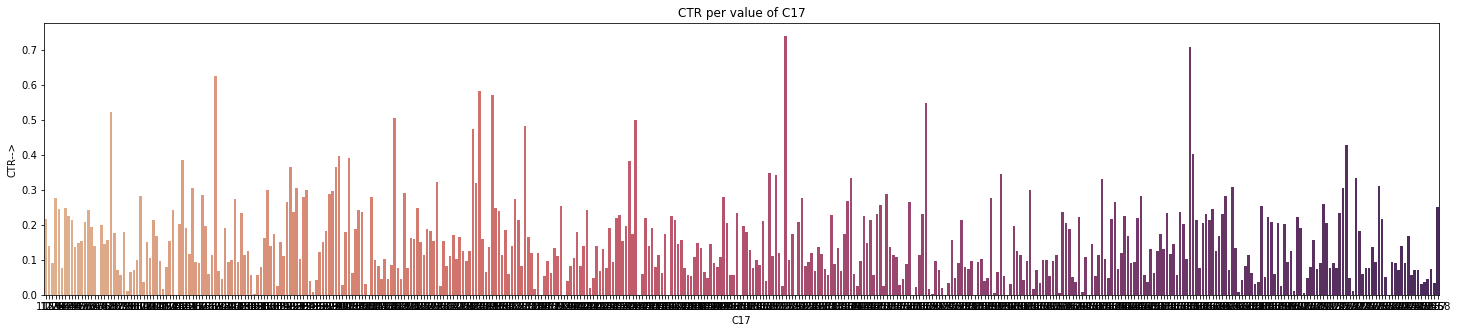

In [128]:
# plot the CTR per value of the C14
df_new=data.groupby(['C17','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per value of C17')
plt.show()

* Here also we can see a nice trend which is very similar to C14, hence this is also a pretty useful feature.

<b> C18 </b>

Here C18 takes 4 unique values , let us plot the impressions and clicks for each value of C18

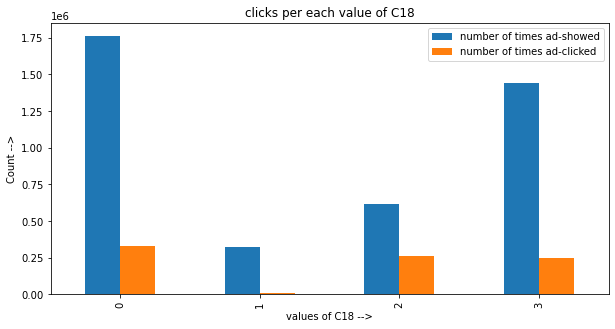

In [129]:
data.groupby(['C18','click']).size().unstack().plot(kind='bar',figsize=(10,5))
plt.ylabel('Count -->')
plt.xlabel('values of C18 -->')
plt.title('clicks per each value of C18')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see the most common values taken by C18 are 0 and 3 which have the highest number of impressions, we will get the CTR values per each value of C18 and see if we find any trend.

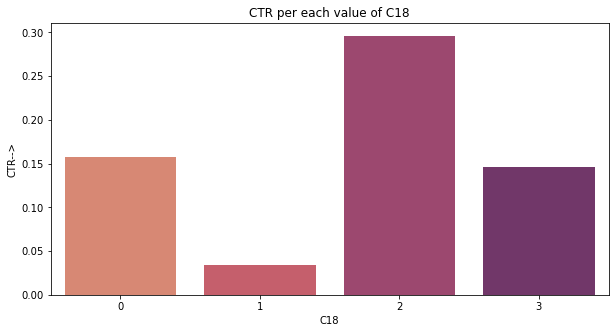

In [130]:
# plot the CTR per value of the C18
df_new=data.groupby(['C18','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR per each value of C18')
plt.show()

* Here we can see that CTR value of C18 value 2 is highest despite having lesser impression count, but we can see the trend which makes a useful feature for our prediction.

<b> C19 </b>

Here C19 is taking 67 unique values , let us plot them and explore the impressions and clicks.

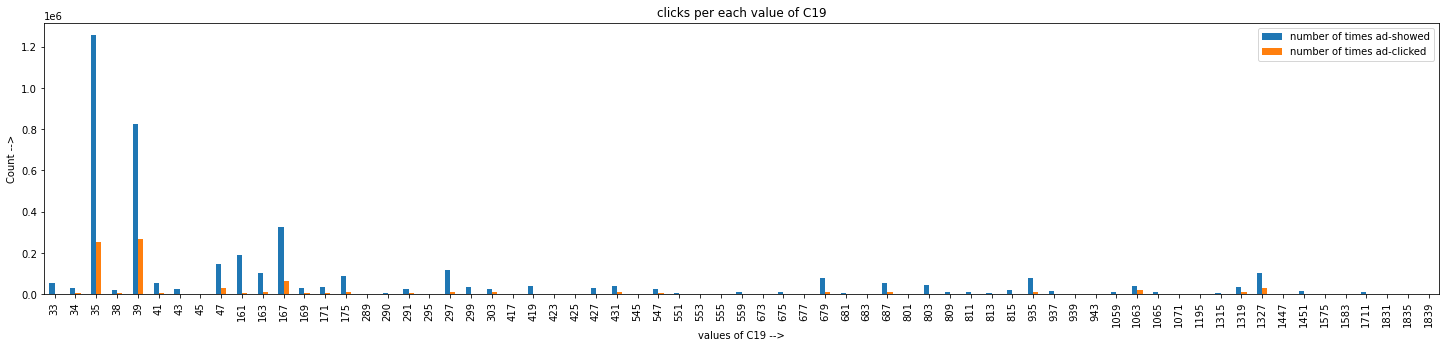

In [131]:
data.groupby(['C19','click']).size().unstack().plot(kind='bar',figsize=(25,5))
plt.ylabel('Count -->')
plt.xlabel('values of C19 -->')
plt.title('clicks per each value of C19')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* It is seen that the most common value the feature C19 takes is 35 and 39 , so let us plot the CTR contribution from the values and see if we get any trend.

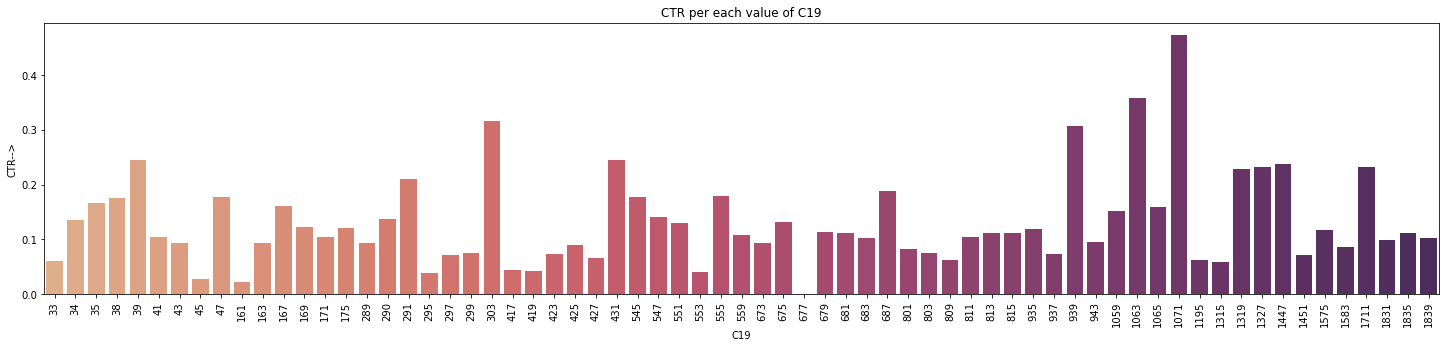

In [134]:
# plot the CTR per value of the C19
df_new=data.groupby(['C19','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.xticks(rotation=90)
plt.ylabel('CTR-->')
plt.title('CTR per each value of C19')
plt.show()

* Here we can see that the C19 values 35 and 39 are having less CTR despite the huge number of impressions that they have. But we can see the trend in CTR values so this feature is useful for our prediction.

<b> C20 </b>

Here we can see that the C20 takes 167 unique values , let us plot the impressions and clicks each value of C20 takes.

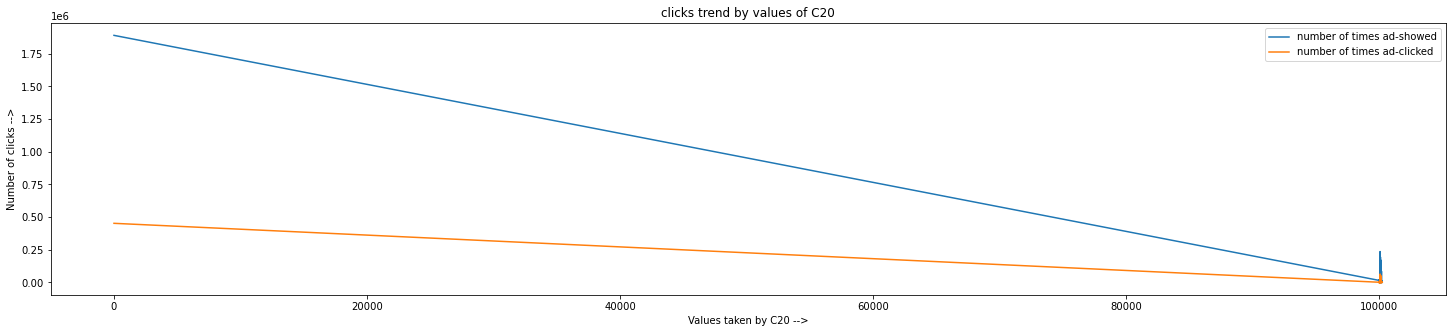

In [135]:
plt.figure(figsize=(25,5))
plt.plot(data.groupby(['C20','click']).size().unstack())
plt.ylabel('Number of clicks -->')
plt.xlabel('Values taken by C20 -->')
plt.title('clicks trend by values of C20')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here it seems like only 1 value of C20 is having highest number of impressions and clicks which is evident from the above graph. Let is see which value  that is.

In [136]:
df_new=data.groupby(['C20','click']).size().unstack()
df_new

click,0,1
C20,,
-1,1890134.0,452308.0
100000,15799.0,1559.0
100001,774.0,183.0
100002,813.0,101.0
100003,13575.0,672.0
...,...,...
100233,12283.0,2497.0
100241,2594.0,377.0
100244,135.0,21.0


* Here we can clearly see that the value of C20 with -1 takes highest impressions and clicks, which means it is the most common value that it can take.
* 1st we will visualize the impressions and clicks without -1 and then see what the distribution looks like.

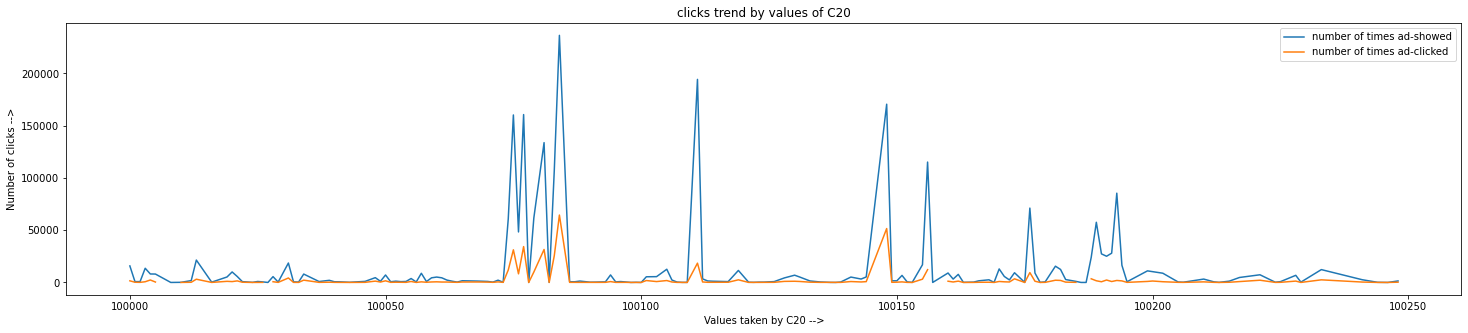

In [137]:
plt.figure(figsize=(25,5))
plt.plot(df_new[1:])
plt.ylabel('Number of clicks -->')
plt.xlabel('Values taken by C20 -->')
plt.title('clicks trend by values of C20')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see the rest of the values are in between 100000 and 100250 and the trend is shown above

We will 1st plot the CTR by including the C20 value of -1 and then if it brings tremendous value , then we can plot the CTR by removing the C20 value of -1.

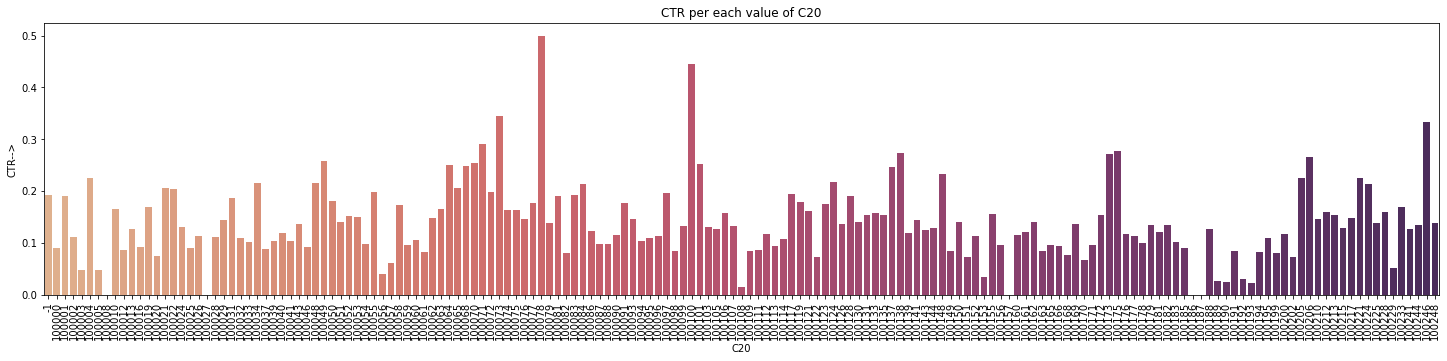

In [139]:
# plot the CTR per value of the C19
df=data.groupby(['C20','click']).size().unstack()
df['CTR']= df[1]/(df[0]+df[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df['CTR'].values,x=df.index,palette='flare')
plt.xticks(rotation=90)
plt.ylabel('CTR-->')
plt.title('CTR per each value of C20')
plt.show()

* Apart from being the most common value -1 value of C20 does not contribute enough to the CTR than some of the values, which seems to be usually the case till now for all the features that we have seen so far.
* but these values contribute the trend with which we can distinguish the ads with better CTR, so it seems pretty useful for our task.

<b> C21 </b>

Here we can see that C21 takes 60 different values, so we will check the plot of the impresions and clicks.

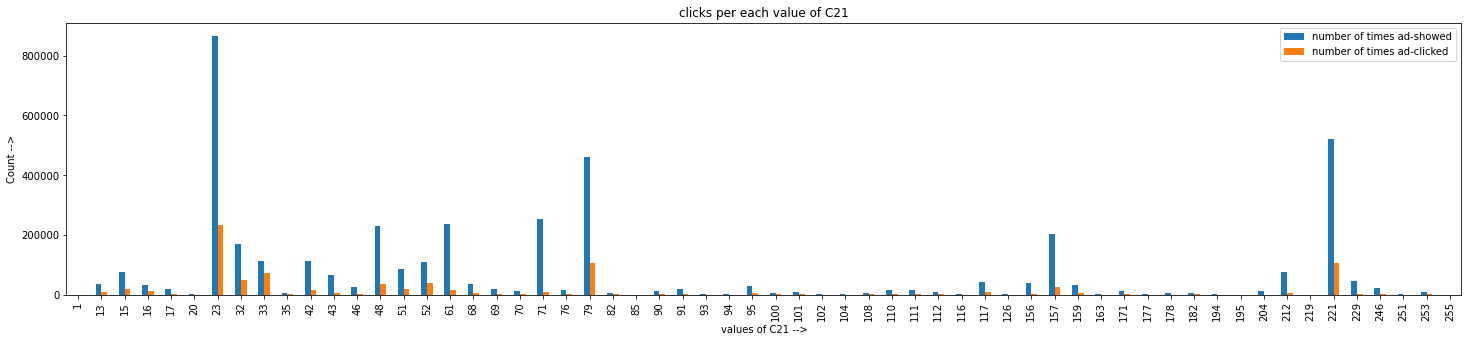

In [141]:
data.groupby(['C21','click']).size().unstack().plot(kind='bar',figsize=(25,5))
plt.ylabel('Count -->')
plt.xlabel('values of C21 -->')
plt.title('clicks per each value of C21')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see the hishest impressions are taken by the ads having the C21 value of 23 and follwed by 79, we will check the contribution to the CTR by each of these values.

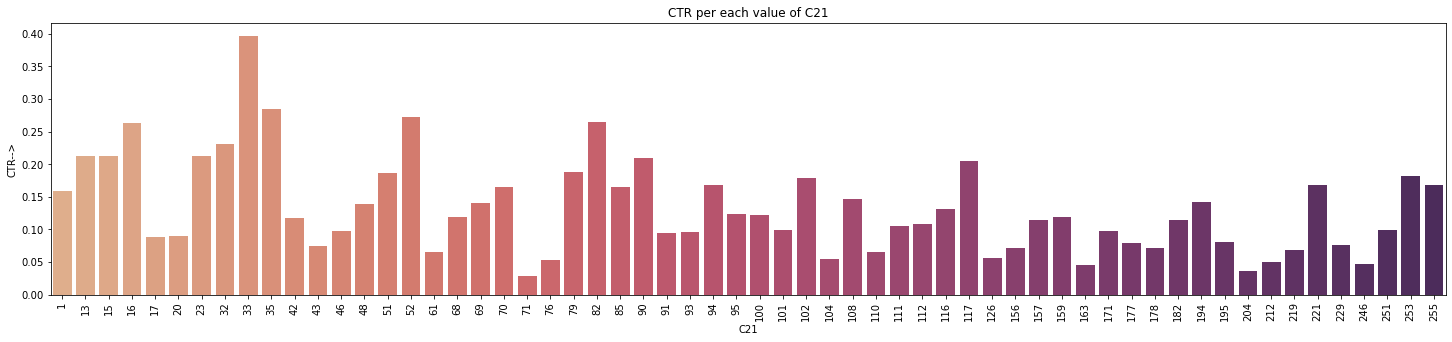

In [142]:
# plot the CTR per value of the C19
df=data.groupby(['C21','click']).size().unstack()
df['CTR']= df[1]/(df[0]+df[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df['CTR'].values,x=df.index,palette='flare')
plt.xticks(rotation=90)
plt.ylabel('CTR-->')
plt.title('CTR per each value of C21')
plt.show()

* Here we can see as usual more number of impressions does not mean more CTR, but nonethless it is having a trend which will help us in distiguishing the Ads that may have high CTR, so it is concluded that this is also a pretty useful feature.

### 3.2.4 Analysis of the data wrt to time

* Here as we are given the time stamp data let us explore the time column of the dataset

In [143]:
data.hour.describe(datetime_is_numeric=True)

count                          5000000
mean     2014-10-25 22:35:29.094720768
min                2014-10-21 00:00:00
25%                2014-10-23 04:00:00
50%                2014-10-26 02:00:00
75%                2014-10-28 14:00:00
max                2014-10-30 23:00:00
Name: hour, dtype: object

The data covers 10 days of click streams data from 2014-10-21 to 2014-10-30, that is 240 hours. One more additional 11th day data is given as the test data without labels. Here if we notice the exact time stamps are not given rather the minutes and the seconds are stripped and only the time bins in hours are given to us.

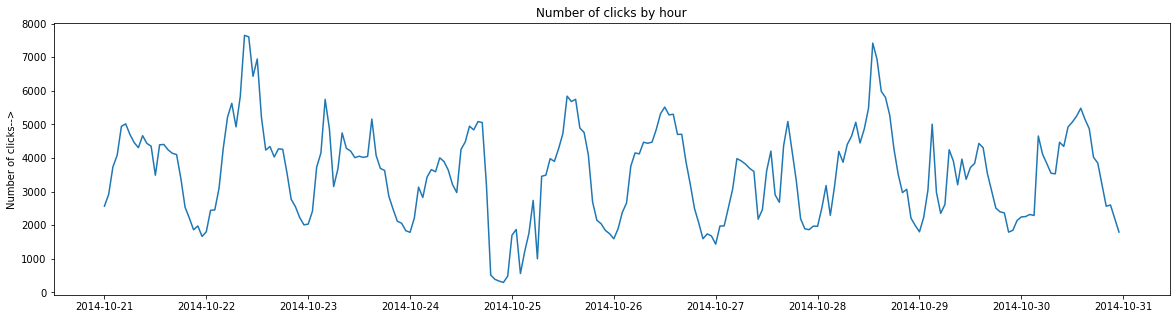

In [144]:
# So here when we apply the group-by we will get the groups by hours which is very convinient for visualization

plt.figure(figsize=(20,5))
plt.plot(data.groupby('hour').agg({'click':'sum'}))
plt.ylabel('Number of clicks-->')
plt.title('Number of clicks by hour')
plt.show()

Here we can clearly see the daily trend in the data. That is the trend is changing by the hour of the day and it seems to be consistant. But if we look closely we see that there is peak activity on the late hours of 24th of october and then it sharply reduces till the morning. This may be due to the fact that it is friday night and also this may also be probably due to the some festive offers because the after 2 days it is halloween so people might be shopping for stuff etc.

* Since the trend is clearly hour basis we can add additional feature which is "hour of the day" which could be useful for us.

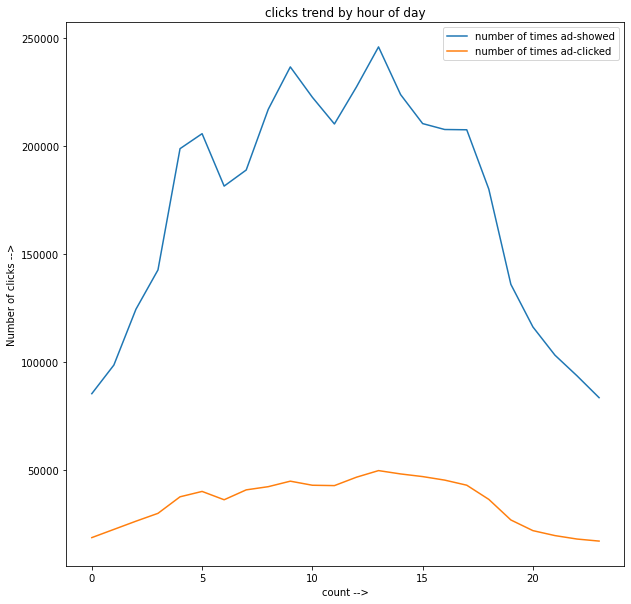

In [145]:
data['hour_of_day'] = data['hour'].apply(lambda x: x.hour)
plt.figure(figsize=(10,10))
plt.plot(data.groupby(['hour_of_day','click']).size().unstack())
plt.ylabel('Number of clicks -->')
plt.xlabel('count -->')
plt.title('clicks trend by hour of day')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here as we can see that the number of clicks are highest at the noon between 1 pm and 2 pm mostly. This is to be expected as it is due to the lunch timings and people tend to look at their phones casually during the lunch time after a break from working for half a day. The least number of clicks are mostly at the midnight as expected. This is mostly due to the general trend and nature of the time series data. But as the trend is gradually increasing ,we can say that usage of the phones is more during peak bussiness hours.
* Here we can also see that we have the number of times the ads are shown are also following the same trend. But if we look closely there are some points where the gap between the number of clicks and the number of impressions( number of the times the ad is shown ) is less. So it can be concluded that "hour of the day" could be useful to some extent to filter out the ads which are being clicked from the ads which are not clicked.
* This gap between the graphs is what quantifies the CTR of the Ad at that particular hour so it makes sense to get the CTR for particular hours. So from the above observation the gap is less at the midnight and hence CTR should be high here despite having least number of clicks.

Let us compute the CTR per hour and confirm the above observation

In [146]:
df_new=data.groupby(['hour_of_day','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
df_new.head()

click,0,1,CTR
hour_of_day,,,
0,85521,18923,0.181178
1,98762,22719,0.187017
2,124570,26517,0.175508
3,142790,30152,0.174347
4,198878,37804,0.159725


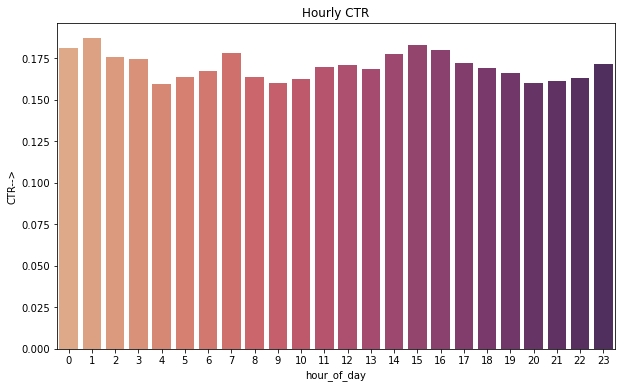

In [147]:
# plot the hourly CTR
plt.figure(figsize=(10,6))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('Hourly CTR')
plt.show()

* As expected above we see that we are having a maximum CTR at midnight 1am to 2am, but there is no obvious trend as to clearly seperate the clicks and non-clicks.
* This feature may not be that useful for the prediction of the ads with most chance of clicking.

Let us see if we have a weekly trend in the Clicks and the CTR with similar analysis as above

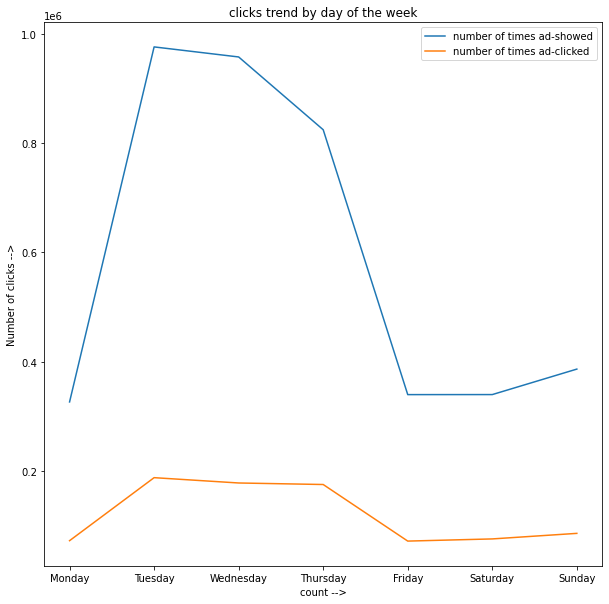

In [148]:
data['day_of_week'] = data['hour'].apply(lambda x: x.day_name())
df_new=data.groupby(['day_of_week','click']).size().unstack()
#here the days of the week are randomly ordered as a result of the above groupby operation so we need to keep them in order
df_1=df_new[df_new.index=='Monday']
df_2=df_new[df_new.index=='Tuesday']
df_3=df_new[df_new.index=='Wednesday']
df_4=df_new[df_new.index=='Thursday']
df_5=df_new[df_new.index=='Friday']
df_6=df_new[df_new.index=='Saturday']
df_7=df_new[df_new.index=='Sunday']
df_new=pd.concat((df_1,df_2,df_3,df_4,df_5,df_6,df_7))
plt.figure(figsize=(10,10))
plt.plot(df_new)
plt.ylabel('Number of clicks -->')
plt.xlabel('count -->')
plt.title('clicks trend by day of the week')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

* Here we can see the trend where middle days of the week are having more clicks and the trend of the impressions and the clicks is identical which is similar to the hour of the day observation.
* So here we can observe the gap between the curves is lowest on monday and weekends, so we can expect these days to have highest CTRs. 
* So here also we can compute the weekly CTR and confirm the above observation.

In [149]:
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
df_new.head()

click,0,1,CTR
day_of_week,,,
Monday,326588,72945,0.182576
Tuesday,975596,188136,0.161666
Wednesday,957222,178419,0.157109
Thursday,824179,175626,0.175660
Friday,339957,72195,0.175166


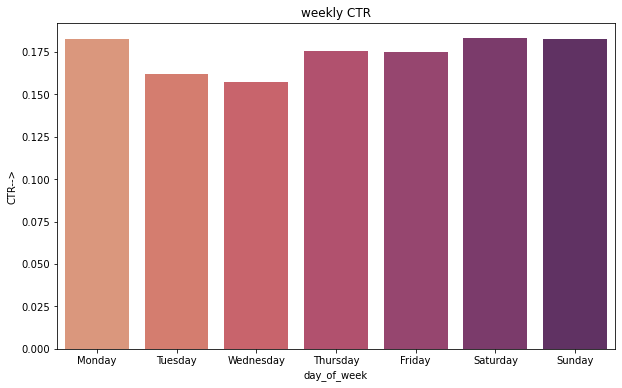

In [150]:
# plot the weekly CTR
plt.figure(figsize=(10,6))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('weekly CTR')
plt.show()

* Here we can observe no obvious trend in the CTR values for weekly so this may also not contribute that much to us in our prediction. 

<b> Here let us engineer a new feature called hourly user count , it helps us visualize the frequency if the users in each hour of the day and see if that helps us in prediction. </b>

In [161]:
#count the number of users per unique hour of the day
data_group=data[['hour_of_day','device_ip']].groupby(['hour_of_day']).count()

Here we are taking device_ip as we have said that it can be taken as the proxy for the user.

In [162]:
data_group

,device_ip
hour_of_day,
0,104444
1,121481
2,151087
3,172942
4,236682
5,246098
6,217995
7,230006
8,259565


In [164]:
from tqdm import tqdm
user_count_feature=[]
for index in tqdm(data['hour_of_day']):
    user_count_feature.append(data_group['device_ip'][index])

100%|██████████| 5000000/5000000 [00:21<00:00, 233216.52it/s]


In [165]:
data['hourly_user_count']=user_count_feature

Let us analyze this and see if it is any useful for us, this is a numerical feature so we can check the distribution of the data 1st.


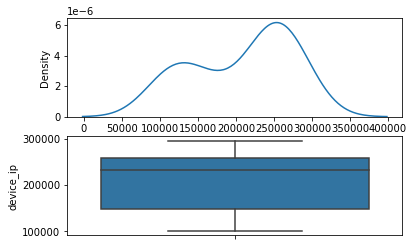

<Figure size 720x504 with 0 Axes>

In [166]:
f, (ax1, ax2) = plt.subplots(2)
plt.figure(figsize=(10,7))
sns.kdeplot(data_group['device_ip'], ax=ax1)
sns.boxplot(x=None,y='device_ip',data=data_group, ax=ax2)
plt.show()

Let us compute the CTR per device ip count and check if we get some trend that may help us.

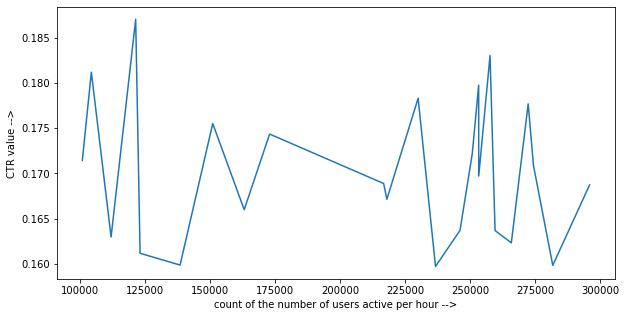

In [167]:
# plot the CTR per count of ads per device
df_new=data.groupby(['hourly_user_count','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,5))
plt.plot(df_new['CTR'])
plt.xlabel('count of the number of users active per hour -->')
plt.ylabel('CTR value -->')
plt.show()

* Here we can observe a nice trend in the CTR value as shown above which means this feature is very useful in predicting the most clikable ad based on the number of users in that particular hour.

<b> Here similar to above feature we can engineer another feature which is hourly impression count which basically means we count the number of ads shown in that particular hour of the dat=y and then use it as a feature </b>

In [168]:
#count the number of ads per unique hour
data_group=data[['hour_of_day','id']].groupby(['hour_of_day']).count()

Here we are taking device_ip as we have said that it can be taken as the proxy for the user.

In [169]:
data_group

,id
hour_of_day,
0,104444
1,121481
2,151087
3,172942
4,236682
5,246098
6,217995
7,230006
8,259565


In [170]:
from tqdm import tqdm
app_count_feature=[]
for index in tqdm(data['hour_of_day']):
    app_count_feature.append(data_group['id'][index])

100%|██████████| 5000000/5000000 [00:21<00:00, 229265.84it/s]


In [171]:
data['hourly_impression_count']=app_count_feature

Let us analyze this and see if it is any useful for us, this is a numerical feature so we can check the distribution of the data 1st.


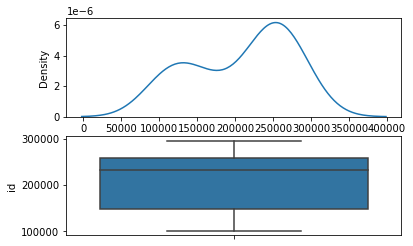

In [173]:
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(data_group['id'], ax=ax1)
sns.boxplot(x=None,y='id',data=data_group, ax=ax2)
plt.show()

Let us compute the CTR per device ip count and check if we get some trend that may help us.

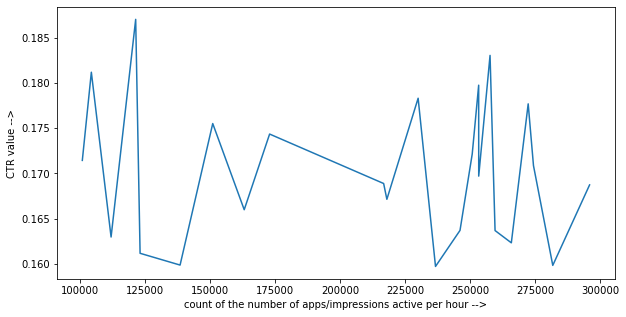

In [174]:
# plot the CTR per count of ads per device
df_new=data.groupby(['hourly_impression_count','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,5))
plt.plot(df_new['CTR'])
plt.xlabel('count of the number of apps/impressions active per hour -->')
plt.ylabel('CTR value -->')
plt.show()

* Here we can observe a nice trend in the CTR value as shown above which means this feature is very useful in predicting the most clickable ad based on the number of impressions in that particular hour.
* Here we can see that the distribution and the values are same as that of the 'hourly_user_count' feature , so we can skip this feature.

In [177]:
data.drop('hourly_impression_count', axis=1, inplace=True)

# 4. Conclusion

Here the features provided in the dataset seem pretty useful and hence we can use them along with some engineered features to get good results. 

Total number of engineered features are 5 out of which most of them seem pretty useful. the features are:
* Device_ip_counts
* Device_id_counts
* Hour_of_day
* Day_of_week
* Hourly_user_count

Additional features to be added while featurization part after performing traintest split
* All the CTR's corresponding to categorical features can be directly taken as pseudo features which will be numerical, and the average CTR for that feature will be taken as the CTR for any unknown feature which we will encounter in the test dataset.
* GBDT features which we will be able to obtain only after using GBDT in the modelling notebook itself.

In [ ]:
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C17,C18,C19,C20,C21,device_ip_counts,device_id_counts,hour_of_day,day_of_week,hourly_user_count
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,2161,0,35,-1,157,6,4125387,0,Tuesday,104444
1,10002028568167339219,0,2014-10-21,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,2161,0,35,100148,157,1,4125387,0,Tuesday,104444
2,10004765361151096125,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1722,0,35,-1,79,8734,4125387,0,Tuesday,104444
3,10005609489911213467,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,2480,3,297,100111,61,1,173,0,Tuesday,104444
4,10006958186789044052,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,2161,0,35,100034,157,1,4125387,0,Tuesday,104444


In [180]:
# Save the dataframe to a Csv file for further use
data.to_csv('train_data.csv', index=False)